 <h1><center>SEA Building Energy Prediction - EDA </center></h1>

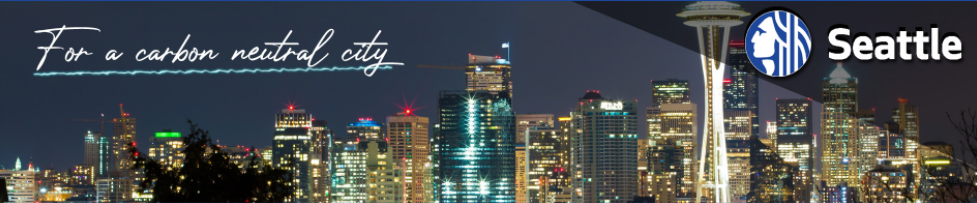

### Project display

To achieve its goal of being a carbon-neutral city by 2050, the city of Seattle is paying close attention to emissions from non-residential buildings.

**Data**

The data can be downloaded at [this address](https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv).

**City of Seattle issue**

Detailed readings were taken by your agents in 2015 and 2016. However, these readings are expensive to obtain, and from those already taken, you want to try to predict the CO2 emissions and the total energy consumption of buildings for which they have not yet been measured.

**The mission**

- Carry out a short exploratory analysis.
- Test different prediction models in order to best respond to the problem. 

# <font color="b">Table of contents</font>

#### <font color="b" id="section_1">1. Get the data and analysis</font>
#### <font color="b" id="section_1_1">1.1 Import of librairies</font>
#### <font color="b" id="section_1_2">1.2. Comparison of dataset columns</font>
#### <font color="b" id="section_1_3">1.3. Data cleaning and exploratory analysis</font>
#### <font color="b" id="section_1_3_1">1.3.1. Handling numerical attributes</font>
#### <font color="b" id="section_1_3_2">1.3.2. Handling categorical attributes</font>
#### <font color="b" id="section_1_4">1.4. Exploratory Data analysis of numerical variables.</font>
#### <font color="b" id="section_1_4_2">1.4.1 univariate analysis.</font>
#### <font color="b" id="section_1_4_2">1.4.2 Multivariate analysis.</font>
#### <font color="b" id="section_1_5">1.5. Exploratory Data analysis of categorical variables.</font>
#### <font color="b" id="section_1_5_1">1.5.1 univariate analysis.</font>
#### <font color="b" id="section_1_5_2">1.5.2 Multivariate analysis.</font>







 #### ====================================================

#### <font color="b" id="section_1">1. Get the data and analysis</font>

#### <font color="b" id="section_1_1">1.1 Import of librairies</font>

In [1]:
from Setle_functions import *
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

In [2]:
# Get path
path = Get_Data_Path()
# Get Csv files
csv_files = Get_Files(path)
csv_files

['2015-building-energy-benchmarking.csv',
 '2016-building-energy-benchmarking.csv']

In [3]:
# Get the list of csv files.
df_csv_list = Read_Files(csv_files, path)
df_csv_list

[      OSEBuildingID  DataYear          BuildingType    PrimaryPropertyType  \
 0                 1      2015        NonResidential                  Hotel   
 1                 2      2015        NonResidential                  Hotel   
 2                 3      2015        NonResidential                  Hotel   
 3                 5      2015        NonResidential                  Hotel   
 4                 8      2015        NonResidential                  Hotel   
 ...             ...       ...                   ...                    ...   
 3335          50049      2015  Multifamily LR (1-4)   Low-Rise Multifamily   
 3336          50055      2015  Multifamily MR (5-9)   Mid-Rise Multifamily   
 3337          50057      2015  Multifamily HR (10+)  High-Rise Multifamily   
 3338          50058      2015  Multifamily LR (1-4)   Low-Rise Multifamily   
 3339          50059      2015  Multifamily LR (1-4)   Low-Rise Multifamily   
 
                     PropertyName TaxParcelIdentif

In [4]:
# Get the dataframes of 2015 and 2016.
df_2015, df_2016 = df_csv_list[0], df_csv_list[1]

Let’s take a look at the top five rows of the datafreame of 2015 and 2016

In [5]:
df_2015.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName TaxParcelIdentificationNumber  \
0   MAYFLOWER PARK HOTEL                     659000030   
1        PARAMOUNT HOTEL                     659000220   
2           WESTIN HOTEL                     659000475   
3              HOTEL MAX                     659000640   
4  WARWICK SEATTLE HOTEL                     659000970   

                                            Location  CouncilDistrictCode  \
0  {'human_address': '{"address":"405 OLIVE WAY",...                    7   
1  {'human_address': '{"address":"724 PINE ST","c...                    7   
2  {'human_address': '{"address":"1900 5TH AVE","...                    7   
3  {'human_address': '{"address":"620 STEWART ST"...                    7   
4  {'human_address': '{"address":"401 LENORA ST",...                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                  1            12.0   
1     DOWNTOWN       1996                  1            11.0   
2     DOWNTOWN       1969                  1            41.0   
3     DOWNTOWN       1926                  1            10.0   
4     DOWNTOWN       1980                  1            18.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            961990                   0                  961990   
3             61320                   0                   61320   
4            119890               12460                  107430   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                          Hotel                  Hotel   
1     Hotel, Parking, Restaurant                  Hotel   
2  Hotel, Parking, Swimming Pool                  Hotel   
3                          Hotel                  Hotel   
4  Hotel, Parking, Swimming Pool                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   
2                   757243.0                      Parking   
3                    61320.0                          NaN   
4                   123445.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   
2                         100000.0               Swimming Pool   
3                              NaN                         NaN   
4                          68009.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   
2                             0.0                      NaN             18.0   
3                             NaN                      NaN              1.0   
4                             0.0                      NaN             67.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   
2              96.6                99.7               242.7   
3             460.4               462.5               636.3   
4             120.1               122.1               228.8   

   SourceEUIWN(kBtu/sf)  SiteEner

In [6]:
df_2016.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

#### <font color="b" id="section_1_2">1.2. Comparison of dataset columns</font>

Let's get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values

In [7]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   OSEBuildingID                      3340 non-null   int64  
 1   DataYear                           3340 non-null   int64  
 2   BuildingType                       3340 non-null   object 
 3   PrimaryPropertyType                3340 non-null   object 
 4   PropertyName                       3340 non-null   object 
 5   TaxParcelIdentificationNumber      3338 non-null   object 
 6   Location                           3340 non-null   object 
 7   CouncilDistrictCode                3340 non-null   int64  
 8   Neighborhood                       3340 non-null   object 
 9   YearBuilt                          3340 non-null   int64  
 10  NumberofBuildings                  3340 non-null   int64  
 11  NumberofFloors                     3332 non-null   float

In [8]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

There are 3,340 and 3,376 instances in the dataset for 2015 and 2016 respectively, which means that it is fairly small by
Machine Learning standards. Notice that the attribute of some instances is less than the total number of instances, which means that there are many missing values.

Also note that the majority of attributes are of numeric type, but others are of object type.

**Notes on the difference between the two datasets:** 
    - 42 columns for 2015 and 46 columns for 2016.
    - There is a difference in the column names between 2015 and 2016.
Let's take a closer look if it's just a difference in form or substance.

Let’s look at the other fields to show a summary of the numerical attributes.

In [9]:
df_2015.describe()

OSEBuildingID  DataYear  CouncilDistrictCode    YearBuilt  \
count    3340.000000    3340.0          3340.000000  3340.000000   
mean    20522.168263    2015.0             4.450898  1967.624850   
std     11511.515874       0.0             2.127203    32.949847   
min         1.000000    2015.0             1.000000  1900.000000   
25%     19921.750000    2015.0             3.000000  1947.000000   
50%     22977.000000    2015.0             4.000000  1973.000000   
75%     25748.000000    2015.0             7.000000  1996.000000   
max     50059.000000    2015.0             7.000000  2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        3340.000000     3332.000000      3.340000e+03   
mean            1.035629        4.682173      9.077289e+04   
std             0.784463        5.458460      1.493058e+05   
min             1.000000        0.000000      2.000000e+04   
25%             1.000000        2.000000      2.848700e+04   
50%             1.000000        4.000000      4.385500e+04   
75%             1.000000        5.000000      8.842800e+04   
max            39.000000       99.000000      2.200000e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         3340.000000            3.340000e+03               3.204000e+03   
mean         11054.032335            7.971886e+04               7.488154e+04   
std          35296.330507            1.292314e+05               1.236249e+05   
min             -3.000000           -5.055000e+04               5.872000e+03   
25%              0.000000            2.668300e+04               2.500000e+04   
50%              0.000000            4.132600e+04               3.900000e+04   
75%           4304.250000            7.872600e+04               7.206750e+04   
max         512608.000000            2.200000e+06               1.719643e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1559.000000                      560.000000   
mean                      27675.646568                    10755.708929   
std                       52480.843425                    22618.529737   
min                           0.000000                        0.000000   
25%                        4959.000000                     2385.250000   
50%                       10600.000000                     5019.500000   
75%                       26224.500000                    10275.000000   
max                      686750.000000                   303910.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2560.000000       3330.000000         3330.000000   
mean         67.894141         53.626126           57.586547   
std          27.154057         53.893311           55.604963   
min           1.000000          0.000000            0.000000   
25%          51.750000         27.300000           29.700000   
50%          76.000000         37.400000           40.900000   
75%          90.000000         59.875000           65.575000   
max         100.000000        800.600000          800.600000   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3330.000000           3330.000000         3.330000e+03   
mean           132.779730            138.936036         4.983106e+06   
std            131.943223            131.359121         1.375330e+07   
min             -2.000000             -2.000000         0.000000e+00   
25%             73.500000             80.300000         9.139300e+05   
50%             95.000000            102.800000         1.776219e+06   
75%            143.900000            151.275000         4.044277e+06   
max           2511.100000           2511.000000         2.958126e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           3.330000e+03    3.330000e+03      3.330000e+03   
mean            5.203055e+06    2.502851e+05      1.017897e+06   
std             1.40075

In [10]:
df_2016.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     3376.000000      3.376000e+03         3376.000000   
mean         4.709123      9.483354e+04         8001.526066   
std          5.494465      2.188376e+05        32326.723928   
min          0.000000      1.128500e+04            0.000000   
25%          2.000000      2.848700e+04            0.000000   
50%          4.000000      4.417500e+04            0.000000   
75%          5.000000      9.099200e+04            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            3.376000e+03               3.356000e+03   
mean             8.683201e+04               7.917764e+04   
std              2.079398e+05               2.017034e+05   
min              3.636000e+03               5.656000e+03   
25%              2.775600e+04               2.509475e+04   
50%              4.321600e+04               3.989400e+04   
75%              8.427625e+04               7.620025e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1679.000000                      596.000000   
mean                      28444.075817                    11738.675166   
std                       54392.917928                    29331.199286   
min                           0.000000                        0.000000   
25%                        5000.000000                     2239.000000   
50%                       10664.000000                     5043.000000   
75%                       26640.000000                    10138.750000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2533.000000       3369.000000         3370.000000   
mean         67.918674         54.732116           57.033798   
std          26.873271         56.273124           57.163330   
min           1.000000          0.000000            0.000000   
25%          53.000000         27.900000           29.400000   
50%          75.000000         38.599998           40.900002   
75%          90.000000         60.400002           64.275002   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3367.000000           3367.000000         3.371000e+03   
mean           134.232848            137.783932         5.403667e+06   
std            139.287554            139.109807         2.161063e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             74.699997             78.400002         9.251286e+05

In [11]:
compare(df_2015, df_2016)

========== Elements in 2015 but absent in 2016 ==========
['GHGEmissionsIntensity(kgCO2e/ft2)', 'OtherFuelUse(kBtu)', 'Comment', 'Location', 'GHGEmissions(MetricTonsCO2e)']

========== Elements in 2016 but absent in 2015 ==========
['ZipCode', 'State', 'TotalGHGEmissions', 'Comments', 'Longitude', 'GHGEmissionsIntensity', 'Address', 'Latitude', 'City']


There are a few differences:

Missing columns in 2015 and 2016.

    - Column names sometimes with unit and sometimes without:
    - GHGEmissionsIntensity(kgCO2e/ft2) vs GHGEmissionsIntensity
    - GHGEmissions(MetricTonsCO2e) vs TotalGHGEmissions
    - The different spelling/synonym: Comment vs Comments. & *Location vs. Address.*
    

It is first necessary to check if: GHGEmissionsIntensity(kgCO2e/ft2) vs GHGEmissionsIntensity and GHGEmissions(MetricTonsCO2e) vs TotalGHGEmissions are of the same order of magnitude to admit that it is the same thing, and therefore it suffices to harmonize the names.

And it's mandatory to check that "Location" and "Address" are the same thing.

Let's look in detail for each of these differences

In [12]:
print(10*"=","GHGEmissions(MetricTonsCO2e)", 10*"=")
df_2015['GHGEmissions(MetricTonsCO2e)'].describe()

========== GHGEmissions(MetricTonsCO2e) ==========


count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [13]:
print(10*"=","TotalGHGEmissions", 10*"=")
df_2016['TotalGHGEmissions'].describe()

========== TotalGHGEmissions ==========


count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

**GHGEmissions(MetricTonsCO2e) of 2015 and TotalGHGEmissions of 2016 have the same order of magnitude, so just rename these columns**

In [14]:
print(10*"=","Location", 10*"=")
df_2015['Location'].head()

========== Location ==========


0    {'human_address': '{"address":"405 OLIVE WAY",...
1    {'human_address': '{"address":"724 PINE ST","c...
2    {'human_address': '{"address":"1900 5TH AVE","...
3    {'human_address': '{"address":"620 STEWART ST"...
4    {'human_address': '{"address":"401 LENORA ST",...
Name: Location, dtype: object

In [15]:
print(10*"=","Location", 10*"=")
df_2016['Address'].head()

========== Location ==========


0      405 Olive way
1    724 Pine street
2    1900 5th Avenue
3     620 STEWART ST
4      401 LENORA ST
Name: Address, dtype: object

In [16]:
print("- For 2015:\n",df_2015['Location'][0],'\n \n- for 2016:\n',df_2016['Address'][0])

- For 2015:
 {'human_address': '{"address":"405 OLIVE WAY","city":"SEATTLE","state":"WA","zip":"98101"}', 'latitude': '47.61219025', 'needs_recoding': False, 'longitude': '-122.33799744'} 
 
- for 2016:
 405 Olive way


We note that for 2015 the 'Location' attribute is a kind of dictionary which contains in addition to the address which is the same as for the 'address' attribute for 2016, other information such as the 'City', 'state', 'zip', 'latitude', .... this dictionary must be splitted down to separate each key.

In [17]:
df_2015['Location'] = [ast.literal_eval(str(item)) for index, item in df_2015.Location.iteritems()]
df_2015 = pd.concat([df_2015.drop(['Location'], axis=1), df_2015['Location'].apply(pd.Series)], axis=1)
df_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in df_2015.human_address.iteritems()]
df_2015 = pd.concat([df_2015.drop(['human_address'], axis=1), df_2015['human_address'].apply(pd.Series)], axis=1)
df_2015.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
0   MAYFLOWER PARK HOTEL                     659000030                    7   
1        PARAMOUNT HOTEL                     659000220                    7   
2           WESTIN HOTEL                     659000475                    7   
3              HOTEL MAX                     659000640                    7   
4  WARWICK SEATTLE HOTEL                     659000970                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                  1            12.0   
1     DOWNTOWN       1996                  1            11.0   
2     DOWNTOWN       1969                  1            41.0   
3     DOWNTOWN       1926                  1            10.0   
4     DOWNTOWN       1980                  1            18.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            961990                   0                  961990   
3             61320                   0                   61320   
4            119890               12460                  107430   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                          Hotel                  Hotel   
1     Hotel, Parking, Restaurant                  Hotel   
2  Hotel, Parking, Swimming Pool                  Hotel   
3                          Hotel                  Hotel   
4  Hotel, Parking, Swimming Pool                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   
2                   757243.0                      Parking   
3                    61320.0                          NaN   
4                   123445.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   
2                         100000.0               Swimming Pool   
3                              NaN                         NaN   
4                          68009.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   
2                             0.0                      NaN             18.0   
3                             NaN                      NaN              1.0   
4                             0.0                      NaN             67.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   
2              96.6                99.7               242.7   
3             460.4               462.5               636.3   
4             120.1               122.1               228.8   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0                 175.1            6981428.0              7097539.0   
1                 195.2            8354235.0              8765788.0   
2                 246.5           73130656.0             75506272.0   
3                 643.2           28229320.0             28363444.0   
4              

Let's recheck the difference between the two datasets again.

In [18]:
compare(df_2015, df_2016)

========== Elements in 2015 but absent in 2016 ==========
['latitude', 'OtherFuelUse(kBtu)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'city', 'Comment', 'zip', 'state', 'GHGEmissions(MetricTonsCO2e)', 'longitude', 'needs_recoding', 'address']

========== Elements in 2016 but absent in 2015 ==========
['ZipCode', 'State', 'TotalGHGEmissions', 'Comments', 'Longitude', 'GHGEmissionsIntensity', 'Address', 'Latitude', 'City']


The last step is just to rename the attributes to get the same names for 2015 and 2016.

In [19]:
df_2015 = df_2015.rename(columns={"latitude":"Latitude", 
                                  "longitude":"Longitude",
                                  "address":"Address", 
                                  "city":"City", 
                                  "state":"State", 
                                  "zip":"ZipCode",
                                  'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                  'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                  'Comment':'Comments'})

In [20]:
compare(df_2015, df_2016)

========== Elements in 2015 but absent in 2016 ==========
['needs_recoding', 'OtherFuelUse(kBtu)']

========== Elements in 2016 but absent in 2015 ==========
[]


These two attributes ('needs_recoding', 'OtherFuelUse(kBtu)') are useless which only exist in the 2015 dataset. They will be deleted

In [21]:
df_2015.drop(['needs_recoding', 'OtherFuelUse(kBtu)'], axis=1, inplace=True)

In [22]:
compare(df_2015, df_2016)

========== Elements in 2015 but absent in 2016 ==========
[]

========== Elements in 2016 but absent in 2015 ==========
[]


**Before starting the feature analysis, we must first check the orders of magnitude of the data for 2016 compared to 2015 and we must assess the differences.**

In [23]:
# We concatenate the two DataFrames.
df = pd.concat([df_2015[df_2016.columns],df_2016], axis = 0).sort_values(["DataYear", "OSEBuildingID"], ignore_index=True)
df.shape

(6716, 46)

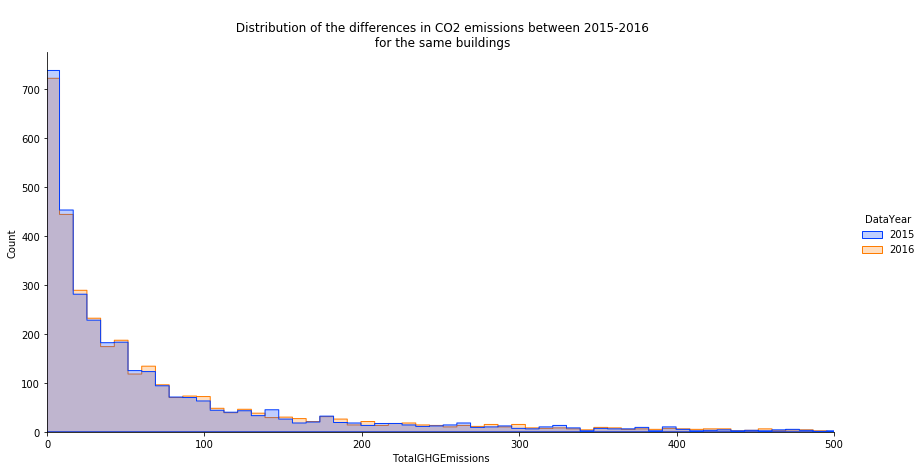

In [24]:
Eco2 = sns.displot(df, x='TotalGHGEmissions', hue='DataYear', element="step", palette='bright', height=6, aspect=2)
plt.xlim(0,500)
Eco2.set(title="\n Distribution of the differences in CO2 emissions between 2015-2016\n for the same buildings")

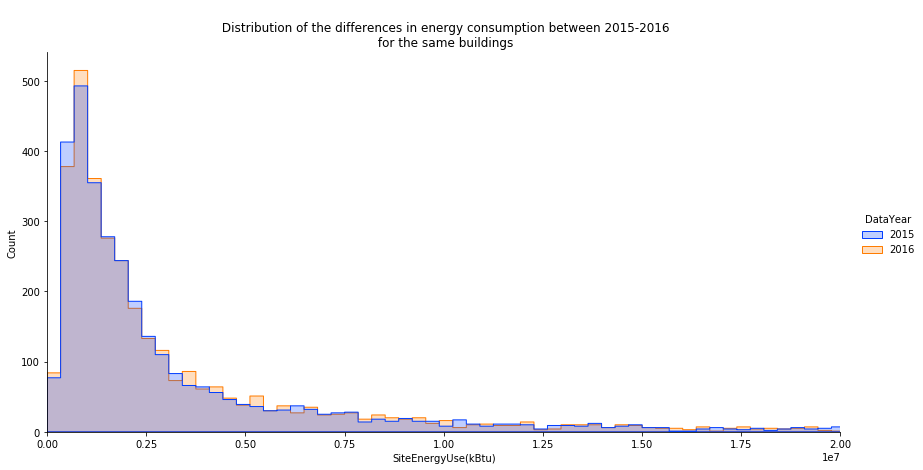

In [25]:
seu_kbtu=sns.displot(df, x='SiteEnergyUse(kBtu)', hue='DataYear', element="step", palette='bright', height=6, aspect=2)
plt.xlim(0,0.2e8)
seu_kbtu.set(title="\n Distribution of the differences in energy consumption between 2015-2016\n for the same buildings")

In [26]:
df_2015[['ZipCode', 'Latitude', 'Longitude']] = df_2015[['ZipCode', 'Latitude', 'Longitude']].astype(float)

Let's plot a histogram for each numerical attribute

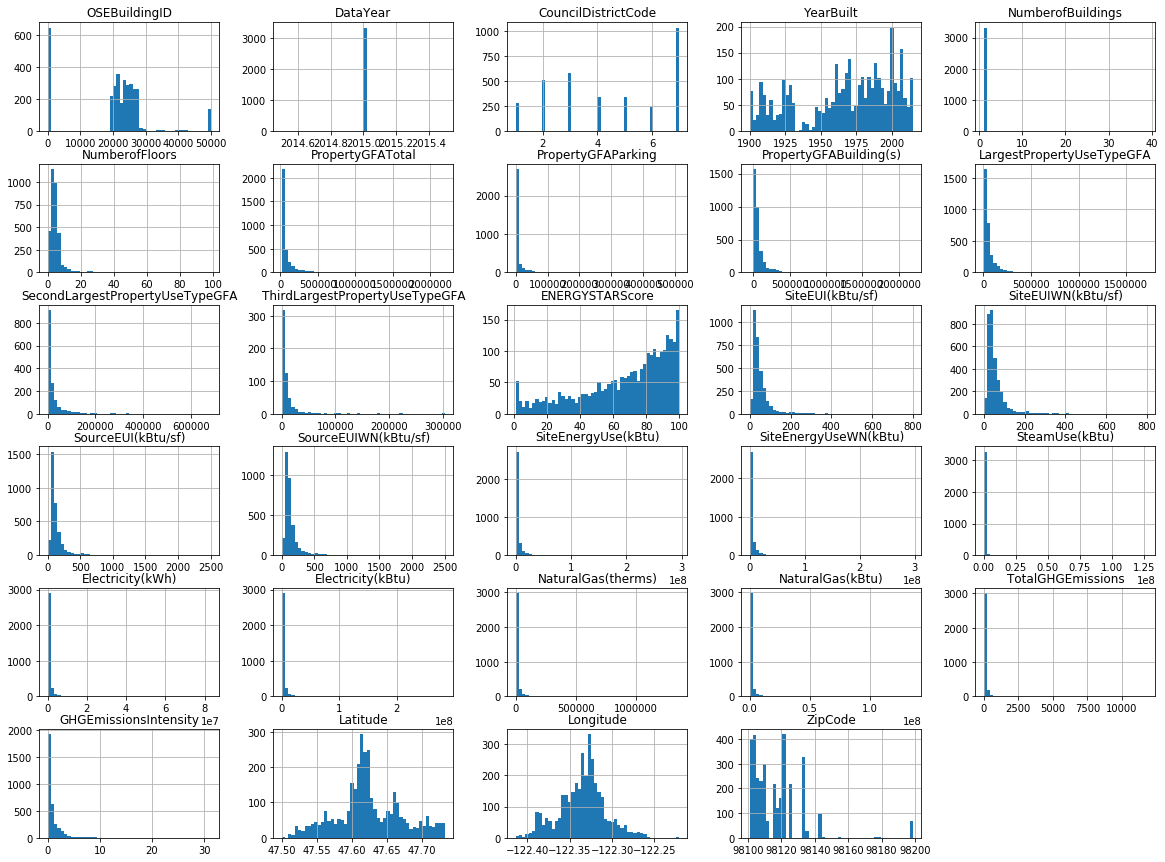

In [27]:
# A histogram for each numerical attribute.
df_2015.hist(bins=50, figsize=(20,15))
plt.show()

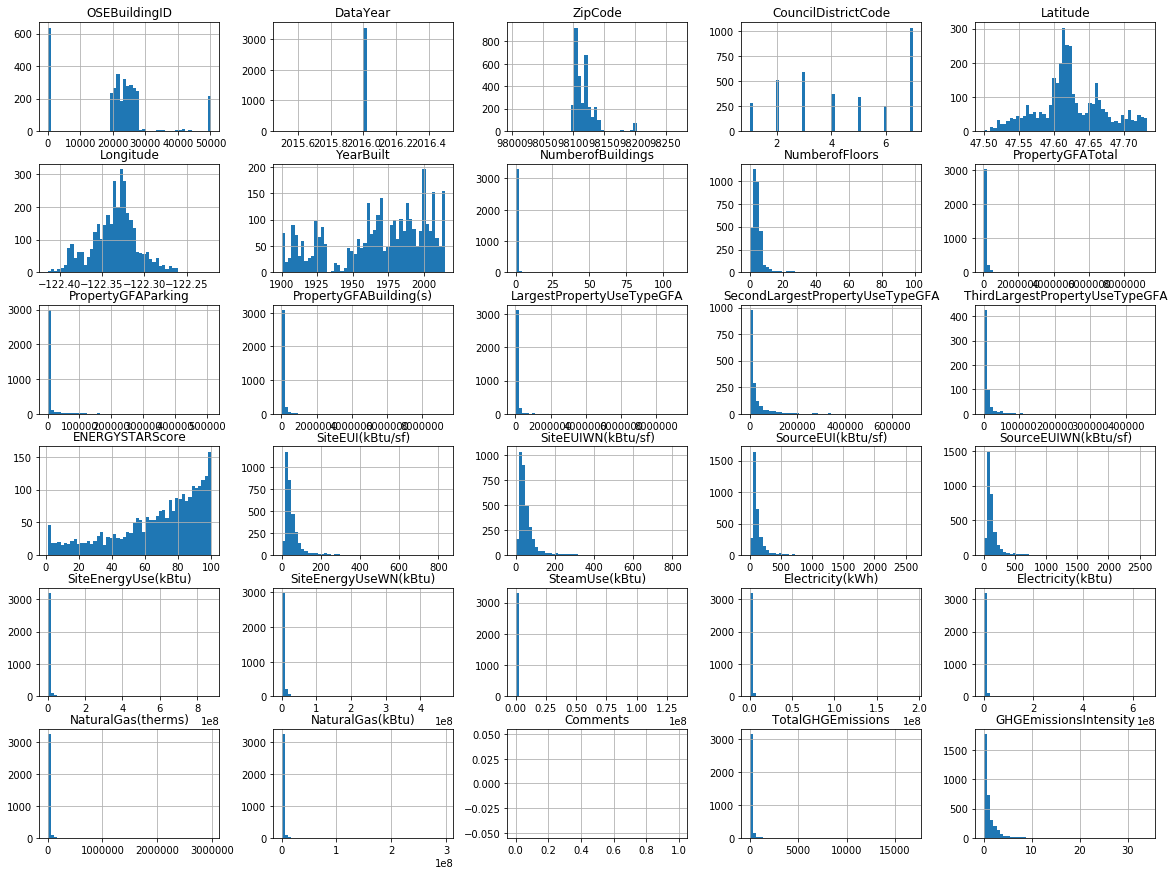

In [28]:
# A histogram for each numerical attribute.
df_2016.hist(bins=50, figsize=(20,15))
plt.show()

**There are some variations from year to year. Overall, there is no different behavior of buildings in terms of energy consumption and co2 emissions. therefore, we will use the most recent data, ie 2016.**

In [29]:
df = df_2016.copy()

#### <font color="b" id="section_1_3">1.3. Data cleaning and exploratory analysis</font>

#### <font color="b" id="section_1_3_1">1.3.1. Data cleaning: Handling missing values</font>

Most machine learning algorithms can't work with missing values, so we'll deal with them as follows:

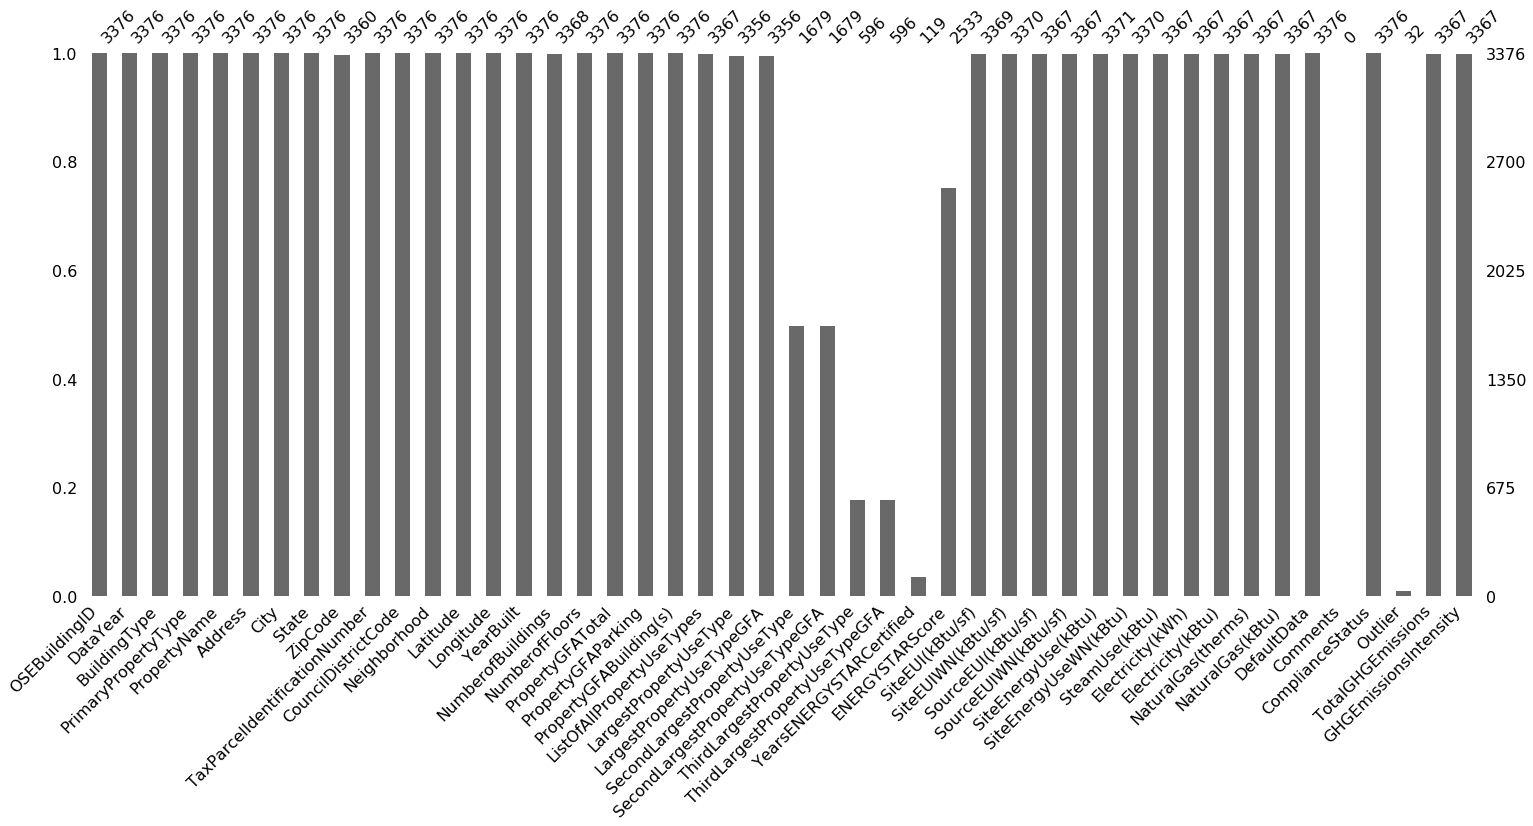

In [30]:
# Visualize the number of missing
# values as a bar chart
msno.bar(df)

Let's calculate the percentage of the missing value cells in each column dataset.

In [31]:
nan_check(df)

OSEBuildingID                      0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
PropertyGFATotal                   0.000000
NumberofFloors                     0.000000
YearBuilt                          0.000000
Longitude                          0.000000
Latitude                           0.000000
Neighborhood                       0.000000
DefaultData                        0.000000
CouncilDistrictCode                0.000000
ComplianceStatus                   0.000000
State                              0.000000
City                               0.000000
Address                            0.000000
PropertyName                       0.000000
PrimaryPropertyType                0.000000
BuildingType                       0.000000
DataYear                           0.000000
TaxParcelIdentificationNumber      0.000000
SiteEnergyUse(kBtu)                0.001481
SiteEnergyUseWN(kBtu)              0.001777
SiteEUIWN(kBtu/sf)              

The "YearsENERGYSTARCertified", "Outlier" and "Comments" columns have more than 95% missing values. we will therefore delete them.

It is clear that there is a correlation between the variables:

     -SecondLargestPropertyUseType
     -SecondLargestPropertyUseTypeGFA
and between:

     -ThirdLargestPropertyUseType
     -ThirdLargestPropertyUseTypeGFA
     
These correlations let us think that the missing values for these variables are interrelated: the same values are missing in two variables.

Before starting the treatment of missing values, it is necessary to begin by determining their mechanism. it is therefore necessary to determine if they are MAR, MANR...

    - Missing Completely at Random(MCAR):
    Missingness has no relationship between any values, observed or missing

    - Missing at Random (MAR):
    There is a systematic relationship between missingness and other observed data, but not the missing data.
    
    - Missing not at Random(MNAR)
    There is a relationship between missingness and its values, missing or non-missing.

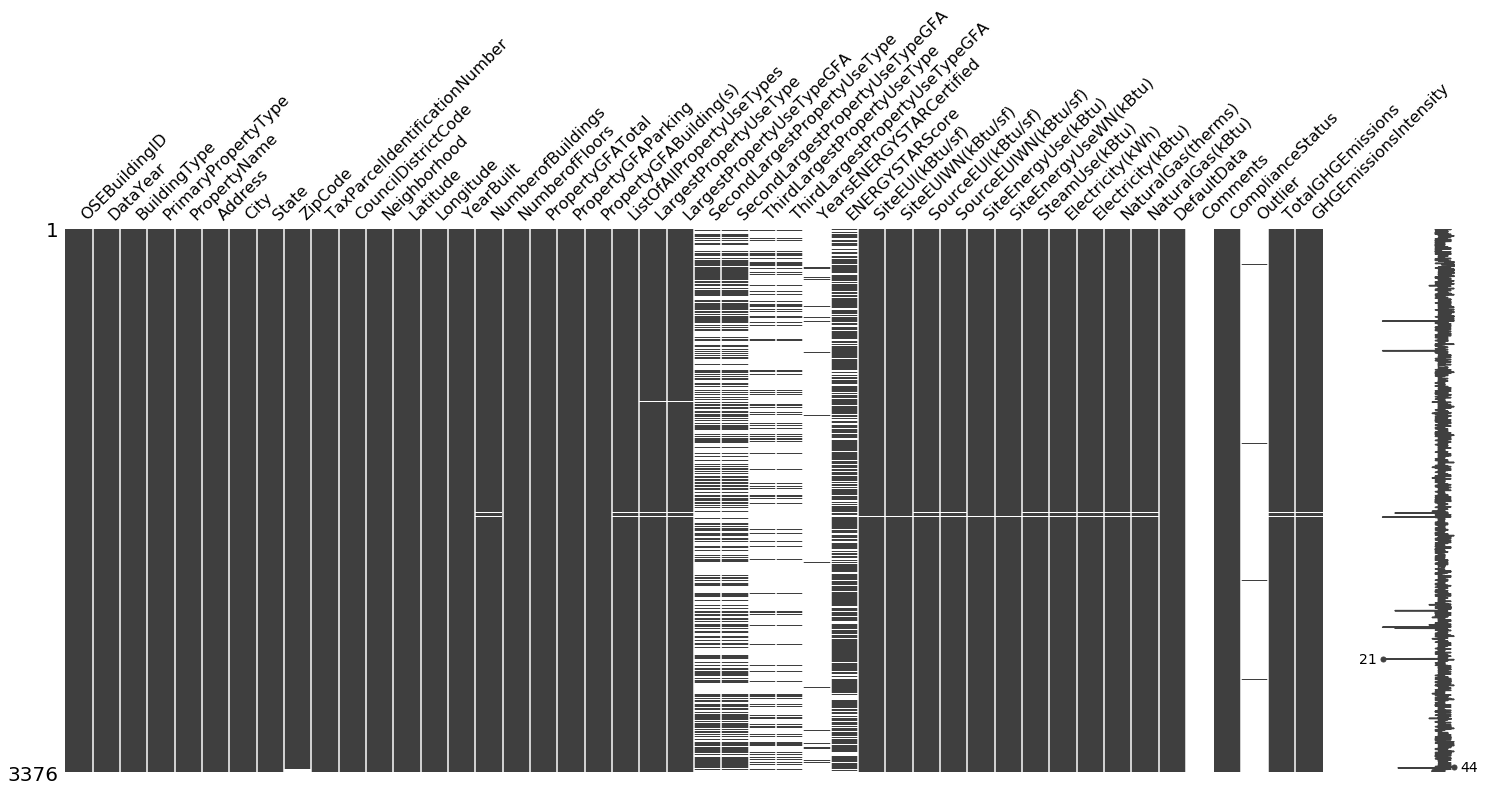

In [32]:
# Visualize missing values as a matrix
msno.matrix(df)

Using this matrix we can very quickly find the pattern of missingness in the dataset. In our dataset, the columns SecondLargestPropertyUseType and SecondLargestPropertyUseTypeGFA have a similar pattern of missing values while EnergyStarScor shows a different pattern.

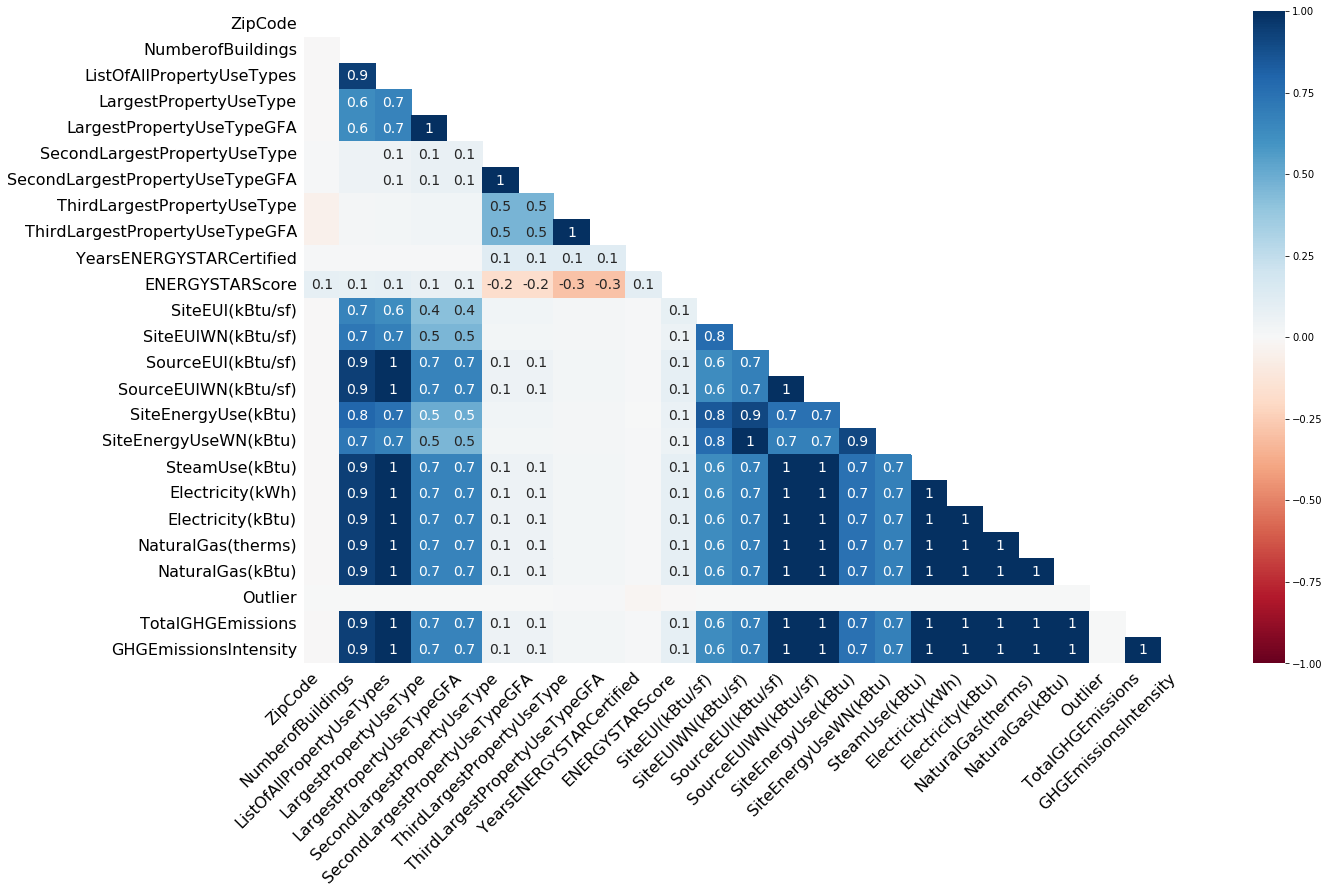

In [33]:
# Visualize the correlation between the number of
# missing values in different columns as a heatmap
msno.heatmap(df)

Heatmap shows the correlation of missingness between every 2 columns:

- A value near -1 means if one variable appears then the other variable is very likely to be missing.
- A value near 0 means there is no dependence between the occurrence of missing values of two variables.
- A value near 1 means if one variable appears then the other variable is very likely to be present.

The dendrogram allows us to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

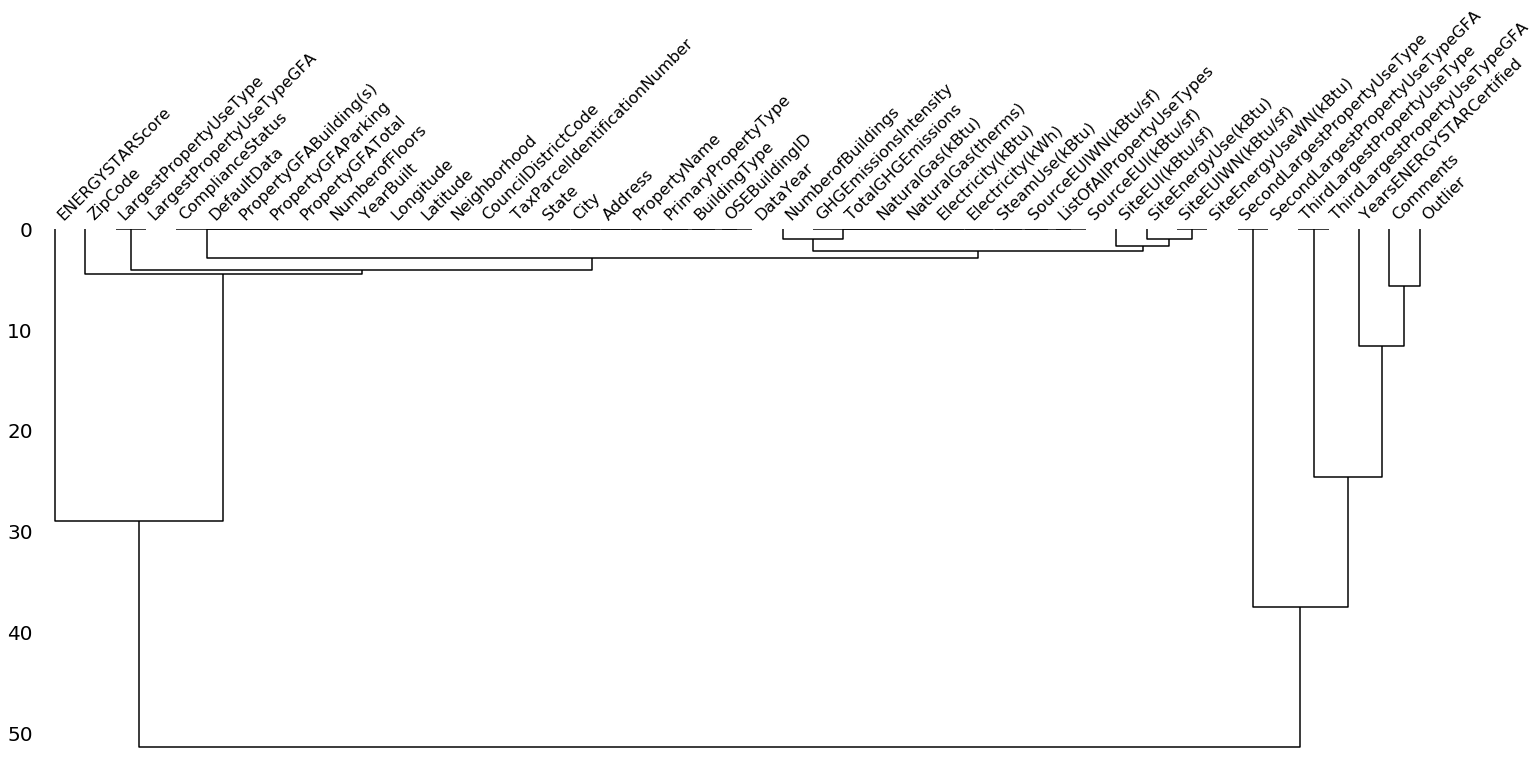

In [34]:
# Visualize the correlation between variables with dendrogram
msno.dendrogram(df)

Without going too far in the analysis of missing values and the mechanism that manages them. We assume in this project and this context that the missing values are **Missing at Random (MAR).**

In [35]:
# drop columns with more than 90% of missing values.
df = nan_drop(df, 0.9)

In [36]:
# Remove lines that only contain NaNs.
df.dropna(how = 'all', axis=0, inplace=True)

#### Handling missing values of target variables: TotalGHGEmissions, SiteEnergyUse(kBtu) 

In [37]:
df[df['TotalGHGEmissions'].isna()]

OSEBuildingID  DataYear          BuildingType  \
573             773      2016        NonResidential   
757           19798      2016  Multifamily LR (1-4)   
1765          23355      2016  Multifamily LR (1-4)   
1790          23437      2016  Multifamily LR (1-4)   
2371          25431      2016  Multifamily LR (1-4)   
2474          25752      2016  Multifamily LR (1-4)   
2480          25763      2016  Multifamily LR (1-4)   
2670          26532      2016        NonResidential   
3347          50082      2016  Multifamily LR (1-4)   

              PrimaryPropertyType         PropertyName  \
573   Small- and Mid-Sized Office     SEATTLE BUILDING   
757          Low-Rise Multifamily       SANDHURST APTS   
1765         Low-Rise Multifamily          GRAHAM VIEW   
1790         Low-Rise Multifamily     MERCER CREST APT   
2371         Low-Rise Multifamily        PONDERAY APTS   
2474         Low-Rise Multifamily  GRANVIEW APARTMENTS   
2480         Low-Rise Multifamily         Villa Andora   
2670           Mixed Use Property     KALBERG BUILDING   
3347         Low-Rise Multifamily       STREAM FIFTEEN   

                     Address     City State  ZipCode  \
573          215 COLUMBIA ST  Seattle    WA  98104.0   
757   7239 SAND POINT WAY NE  Seattle    WA  98115.0   
1765  6040 CALIFORNIA AVE SW  Seattle    WA  98136.0   
1790         500 W MERCER ST  Seattle    WA  98119.0   
2371        5625 15TH AVE NE  Seattle    WA  98105.0   
2474          1120 N 93RD ST  Seattle    WA  98103.0   
2480  1520 CALIFORNIA AVE SW  Seattle    WA  98116.0   
2670  4515 UNIVERSITY WAY NE  Seattle    WA  98105.0   
3347          605 15TH AVE E  Seattle    WA  98112.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
573                     0939000245                    7   
757                     0225049032                    4   
1765                    7625703280                    1   
1790                    3876900230                    7   
2371                    5226300030                    4   
2474                    9267200155                    6   
2480                    9272201340                    1   
2670                    8816401120                    4   
3347                    3303700030                    3   

               Neighborhood  Latitude  Longitude  YearBuilt  \
573                DOWNTOWN  47.60380 -122.33293       1924   
757               NORTHEAST  47.68149 -122.26471       1977   
1765              SOUTHWEST  47.54731 -122.38656       1992   
1790  MAGNOLIA / QUEEN ANNE  47.62479 -122.36364       1957   
2371              NORTHEAST  47.67025 -122.31232       1963   
2474              NORTHWEST  47.69658 -122.34342       1989   
2480              SOUTHWEST  47.58968 -122.38587       1969   
2670              NORTHEAST  47.66182 -122.31345       1928   
3347                   EAST  47.62441 -122.31300       2015   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
573                 NaN               4             63150                   0   
757                 NaN               3             33166                   0   
1765                NaN               4             29357                   0   
1790                NaN               4             23636                   0   
2371                NaN               4             28472                   0   
2474                NaN               4             29562                8531   
2480                NaN               3             30420                   0   
2670                NaN               2             20760                   0   
3347                1.0               4             36685                8254   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
573                    63150                       NaN                    NaN   
757                    33166                       NaN                    NaN   
1765                   29357         

In [38]:
df[df['SiteEnergyUse(kBtu)'].isna()]

OSEBuildingID  DataYear          BuildingType  \
573             773      2016        NonResidential   
757           19798      2016  Multifamily LR (1-4)   
1790          23437      2016  Multifamily LR (1-4)   
2474          25752      2016  Multifamily LR (1-4)   
2670          26532      2016        NonResidential   

              PrimaryPropertyType         PropertyName  \
573   Small- and Mid-Sized Office     SEATTLE BUILDING   
757          Low-Rise Multifamily       SANDHURST APTS   
1790         Low-Rise Multifamily     MERCER CREST APT   
2474         Low-Rise Multifamily  GRANVIEW APARTMENTS   
2670           Mixed Use Property     KALBERG BUILDING   

                     Address     City State  ZipCode  \
573          215 COLUMBIA ST  Seattle    WA  98104.0   
757   7239 SAND POINT WAY NE  Seattle    WA  98115.0   
1790         500 W MERCER ST  Seattle    WA  98119.0   
2474          1120 N 93RD ST  Seattle    WA  98103.0   
2670  4515 UNIVERSITY WAY NE  Seattle    WA  98105.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
573                     0939000245                    7   
757                     0225049032                    4   
1790                    3876900230                    7   
2474                    9267200155                    6   
2670                    8816401120                    4   

               Neighborhood  Latitude  Longitude  YearBuilt  \
573                DOWNTOWN  47.60380 -122.33293       1924   
757               NORTHEAST  47.68149 -122.26471       1977   
1790  MAGNOLIA / QUEEN ANNE  47.62479 -122.36364       1957   
2474              NORTHWEST  47.69658 -122.34342       1989   
2670              NORTHEAST  47.66182 -122.31345       1928   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
573                 NaN               4             63150                   0   
757                 NaN               3             33166                   0   
1790                NaN               4             23636                   0   
2474                NaN               4             29562                8531   
2670                NaN               2             20760                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
573                    63150                       NaN                    NaN   
757                    33166                       NaN                    NaN   
1790                   23636                       NaN                    NaN   
2474                   21031                       NaN                    NaN   
2670                   20760                       NaN                    NaN   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
573                         NaN                          NaN   
757                         NaN                          NaN   
1790                        NaN                          NaN   
2474                        NaN                          NaN   
2670                        NaN                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
573                               NaN                         NaN   
757                               NaN                         NaN   
1790                              NaN                         NaN   
2474                              NaN                         NaN   
2670                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
573                              NaN              NaN               NaN   
757                              NaN              NaN               NaN   
1790                             NaN              NaN               NaN   
2474                             NaN              NaN               NaN   
2670                             NaN              NaN               NaN   

      SiteEUIWN(kBtu/sf)  Sour

**We do not know why there are missing values for the target variables, to avoid introducing values that could distort the result, it is preferable to delete them.**

In [39]:
df.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [40]:
# drop NaN values for target variable: TotalGHGEmissions 
index_TotalGHGEmissions_nan = df['TotalGHGEmissions'].index[df['TotalGHGEmissions'].isnull()]
df = df.drop(index=index_TotalGHGEmissions_nan)

In [41]:
Convert_NaN_to_Zero = ['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'LargestPropertyUseTypeGFA']

In [42]:
# Replacement of NaNs by zero for : 'ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'LargestPropertyUseTypeGFA'
df[Convert_NaN_to_Zero] = df[Convert_NaN_to_Zero].fillna(0, )

In [43]:
# Replacement of NaNs by No_information for: 'ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'LargestPropertyUseTypeGFA'
Var_No_Info = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
df[Var_No_Info] = df[Var_No_Info].fillna('No_information')

In [44]:
# 'NumberofBuildings', 'NumberofFloors' et 'ENERGYSTARScore' must not be NaN or 0.
df['NumberofBuildings'].fillna(1, inplace=True)
df['ENERGYSTARScore'].fillna(1, inplace=True)
df['NumberofFloors'].fillna(1, inplace=True)

In [45]:
# Test to check if 'NumberofBuildings' and 'NumberofFloors' no longer contain NaN:
for col in ['NumberofBuildings', 'ENERGYSTARScore', 'NumberofFloors']:
    print (col, ": ", df[col].isna().sum())

NumberofBuildings :  0
ENERGYSTARScore :  0
NumberofFloors :  0


In [46]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [47]:
# the project specifies that only non-residential buildings will be taken into account. It is therefore useless to keep the others. 
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

The suffixes WN: "Weather Normalized" - These are the measurements normalized with the climatic conditions. As part of our analysis, the weather will not be taken into account. We will therefore start by deleting these variables: 

In [48]:
# drop of variables with the suffixes WN:
df.drop(search_componant(df,'WN'), axis=1, inplace=True)

In [49]:
# drop of redundant variables
redundant_features = ['NaturalGas(therms)','Electricity(kWh)']
df.drop(redundant_features, axis=1, inplace=True) 

The goal of our program is to remove expensive readings for years to come, so we will exclude all reading data from our dataset. 

In [50]:
# drop of reading variables
df = df.drop(['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)'], axis=1)

In [51]:
# drop of usless variables
# DataYear will be droped when other variables will be created using it.
df = df.drop(['State','ZipCode','City'], axis=1)

In [52]:
# We drop eliminate surface data.
df = df.drop(['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)'], axis=1)

In [53]:
df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address TaxParcelIdentificationNumber  \
0         Mayflower park hotel    405 Olive way                    0659000030   
1              Paramount Hotel  724 Pine street                    0659000220   
2      5673-The Westin Seattle  1900 5th Avenue                    0659000475   
3                    HOTEL MAX   620 STEWART ST                    0659000640   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST                    0659000970   

   CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  \
0                    7     DOWNTOWN  47.61220 -122.33799       1927   
1                    7     DOWNTOWN  47.61317 -122.33393       1996   
2                    7     DOWNTOWN  47.61393 -122.33810       1969   
3                    7     DOWNTOWN  47.61412 -122.33664       1926   
4                    7     DOWNTOWN  47.61375 -122.34047       1980   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                1.0              12             88434                   0   
1                1.0              11            103566               15064   
2                1.0              41            956110              196718   
3                1.0              10             61320                   0   
4                1.0              18            175580               62000   

   PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   88434                          Hotel   
1                   88502     Hotel, Parking, Restaurant   
2                  759392                          Hotel   
3                   61320                          Hotel   
4                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0               No_information                              0.0   
1                      Parking                          15064.0   
2               No_information                              0.0   
3               No_information                              0.0   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0              No_information                             0.0   
1                  Restaurant                          4622.0   
2              No_information                             0.0   
3              No_information                             0.0   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEnergyUse(kBtu)  DefaultData ComplianceStatus  \
0             60.0            7226362.5        False        Compliant   
1             61.0            8387933.0        False        Compliant   
2             43.0           72587024.0        False        Compliant   
3             56.0            6794584.0        False        Compliant   
4             75.0           14172606.0        False        Compliant   

   TotalGHGEmissions  GHGEmissionsIntensity  
0             249.98                   2.83  
1             295.86                   2.86  
2            2089.28                   2.19  
3             286.43                   4.67  
4             505.01                   2.88

In [54]:
# Check if some nan remain.
i=0
for col in df.columns:
    if df[col].isnull().sum()>0:
        print(i, ':', df[i].isnull().sum())
        i+=1
if i==0:
    print("There are no more nan left in the dataset")  

There are no more nan left in the dataset


#### <font color="b" id="section_1_3_1">1.3.1. Handling numerical attributes</font>

#### Checking for negative values.

There are quantities which do not admit of having negative values. We will check that.

In [55]:
df.select_dtypes(np.number).min()

OSEBuildingID                          1.00000
DataYear                            2016.00000
CouncilDistrictCode                    1.00000
Latitude                              47.49917
Longitude                           -122.41182
YearBuilt                           1900.00000
NumberofBuildings                      0.00000
NumberofFloors                         0.00000
PropertyGFATotal                   11285.00000
PropertyGFAParking                     0.00000
PropertyGFABuilding(s)              3636.00000
LargestPropertyUseTypeGFA              0.00000
SecondLargestPropertyUseTypeGFA        0.00000
ThirdLargestPropertyUseTypeGFA         0.00000
ENERGYSTARScore                        1.00000
SiteEnergyUse(kBtu)                    0.00000
TotalGHGEmissions                     -0.80000
GHGEmissionsIntensity                 -0.02000
dtype: float64

**- TotalGHGEmissions and GHGEmissionsIntensity cannot be negative.**

**- Number of Buildings and Number of Floors can't be zero**

In [56]:
#Eliminate negative values
neg_value_list = ['TotalGHGEmissions', 'GHGEmissionsIntensity']
for col in neg_value_list:
    index_to_drop=df.loc[df[col]<0, col].index
    df.drop(index_to_drop, inplace=True)

In [57]:
# check if the changes have been made
df[neg_value_list].min()

TotalGHGEmissions        0.0
GHGEmissionsIntensity    0.0
dtype: float64

In [58]:
# Replace the value 0 by 1:
df['NumberofBuildings'].replace(0, 1, inplace=True)
df['NumberofFloors'].replace(0, 1, inplace=True)

In [59]:
#Check if the changes have been made
df[['NumberofBuildings', 'NumberofFloors']].min()

NumberofBuildings    1.0
NumberofFloors       1.0
dtype: float64

In [60]:
# Checking zero values for TotalGHGEmissions.
df[df['TotalGHGEmissions']==0]

OSEBuildingID  DataYear       BuildingType          PrimaryPropertyType  \
28               34      2016  SPS-District K-12                  K-12 School   
151             242      2016  SPS-District K-12                  K-12 School   
304             435      2016     NonResidential                        Other   
510             700      2016     NonResidential  Supermarket / Grocery Store   
745           19776      2016     NonResidential                        Other   
1358          21616      2016  SPS-District K-12                  K-12 School   

                            PropertyName                Address  \
28                        Meany Building   301/300 21st Ave. E.   
151              Olympic View Elementary      504 N.E. 95th St.   
304   Washington State Convention Center            705 Pike St   
510            IUC- Whole Foods Interbay  2001 15th Avenue West   
745       Welcome Home Society - PriceCo     13537 Aurora Ave N   
1358            Olympic Hills Elementary   13018 20th Ave. N.E.   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
28                      0688000090                    3   
151                     5100404840                    5   
304                     1978200105                    7   
510                     7666201460                    7   
745                     0164000020                    5   
1358                    2126049041                    5   

               Neighborhood  Latitude  Longitude  YearBuilt  \
28                  Central  47.62266 -122.30547       1955   
151                   NORTH  47.69823 -122.32126       1989   
304                DOWNTOWN  47.61195 -122.33167       1990   
510   MAGNOLIA / QUEEN ANNE  47.63718 -122.37734       2008   
745               NORTHWEST  47.72777 -122.34503       2002   
1358                  NORTH  47.72369 -122.30676       1954   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
28                  1.0               1            126351                   0   
151                 1.0               2             52792                   0   
304                 1.0               6           1400000                   0   
510                 1.0               1             57176                   0   
745                 1.0               1             29924                   0   
1358                1.0               1             42292                   0   

      PropertyGFABuilding(s)  \
28                    126351   
151                    52792   
304                  1400000   
510                    57176   
745                    29924   
1358                   42292   

                              ListOfAllPropertyUseTypes  \
28                                          K-12 School   
151                                         K-12 School   
304                          Convention Center, Parking   
510   Personal Services (Health/Beauty, Dry Cleaning...   
745                                   Other - Education   
1358                                        K-12 School   

         LargestPropertyUseType  LargestPropertyUseTypeGFA  \
28                  K-12 School                   126351.0   
151                 K-12 School                    55480.0   
304           Convention Center                  1072000.0   
510   Supermarket/Grocery Store                    39500.0   
745           Other - Education                    29924.0   
1358                K-12 School                    43188.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
28                 No_information                              0.0   
151                No_information                              0.0   
304                       Parking                         686750.0   
510                  Retail Store                          15000.0   
745                No_information                              0.0   
1358               No_information                 

In [61]:
# Checking zero values for SiteEnergyUse(kBtu).
df[df['SiteEnergyUse(kBtu)']==0]

OSEBuildingID  DataYear       BuildingType PrimaryPropertyType  \
28               34      2016  SPS-District K-12         K-12 School   
31               37      2016  SPS-District K-12         K-12 School   
62               87      2016  SPS-District K-12         K-12 School   
81              118      2016  SPS-District K-12         K-12 School   
85              122      2016  SPS-District K-12         K-12 School   
95              140      2016  SPS-District K-12         K-12 School   
132             217      2016  SPS-District K-12         K-12 School   
138             227      2016  SPS-District K-12         K-12 School   
151             242      2016  SPS-District K-12         K-12 School   
304             435      2016     NonResidential               Other   
611             820      2016  SPS-District K-12         K-12 School   
626             850      2016  SPS-District K-12         K-12 School   
745           19776      2016     NonResidential               Other   
1358          21616      2016  SPS-District K-12         K-12 School   
1891          23722      2016  SPS-District K-12         K-12 School   
3166          49703      2016  SPS-District K-12         K-12 School   

                            PropertyName               Address  \
28                        Meany Building  301/300 21st Ave. E.   
31                   John Hay Elementary      201 Garfield St.   
62              Arbor Heights Elementary   3701 S.W. 104th St.   
81                        Pathfinder K-8   1901 SW Genesee St.   
85                  John Muir Elementary    3301 S. Horton St.   
95                   B.F. Day Elementary   3921 Linden Ave. N.   
132                       Whitman Middle    9201 15th Ave. NW.   
138                    Washington Middle       2101 S. Jackson   
151              Olympic View Elementary     504 N.E. 95th St.   
304   Washington State Convention Center           705 Pike St   
611            Bailey Gatzert Elementary    1301 E. Yesler Way   
626                    Leschi Elementary         135 32nd Ave.   
745       Welcome Home Society - PriceCo    13537 Aurora Ave N   
1358            Olympic Hills Elementary  13018 20th Ave. N.E.   
1891              North Beach Elementary    9018 24th Ave N.W.   
3166                Catharine Blaine K-8     2550 34th Ave. W.   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
28                      0688000090                    3   
31                      0809000005                    7   
62                      2518400005                    1   
81                      1324039116                    1   
85                      1524049002                    2   
95                      1931301145                    6   
132                     3526039131                    6   
138                     3646100540                    3   
151                     5100404840                    5   
304                     1978200105                    7   
611                     0007600137                    3   
626                     3416600240                    3   
745                     0164000020                    5   
1358                    2126049041                    5   
1891                    3526039024                    6   
3166                    2225039016                    7   

               Neighborhood  Latitude  Longitude  YearBuilt  \
28                  Central  47.62266 -122.30547       1955   
31    MAGNOLIA / QUEEN ANNE  47.63290 -122.35172       1989   
62                SOUTHWEST  47.50970 -122.37759       1948   
81                 DELRIDGE  47.56360 -122.35800       1999   
85                SOUTHEAST  47.57324 -122.29058       1991   
95               LAKE UNION  47.65464 -122.34912       1991   
132                 BALLARD  47.69675 -122.37760       1959   
138                 CENTRAL  47.59796 -122.30415       1963   
151                   NORTH  47.69823 -122.32126       1989   
304                DOWNT

In [62]:
# drop of zero values for TotalGHGEmissions.
index_TotalGHGEmissions_zero = df['TotalGHGEmissions'].index[df['TotalGHGEmissions']==0]

df = df.drop(index=index_TotalGHGEmissions_zero)

In [63]:
# drop of zero values SiteEnergyUse(kBtu).
index_SiteEnergyUse_zero = df['SiteEnergyUse(kBtu)'].index[df['SiteEnergyUse(kBtu)']==0]

df = df.drop(index=index_SiteEnergyUse_zero)

#### Chek of duplicate data

In [121]:
# Cheking of duplicates. 
df.index.duplicated().sum()

0

#### <font color="b" id="section_1_3_2">1.3.2. Handling categorical attributes</font>

In [65]:
# The list of variables (object types)
df.select_dtypes(['object']).nunique().sort_values(ascending=False)

PropertyName                     1644
Address                          1627
TaxParcelIdentificationNumber    1567
ListOfAllPropertyUseTypes         370
LargestPropertyUseType             56
SecondLargestPropertyUseType       48
ThirdLargestPropertyUseType        40
PrimaryPropertyType                22
Neighborhood                       19
BuildingType                        5
ComplianceStatus                    3
dtype: int64

In [66]:
# Convert from numerical to categorical variable
df['CouncilDistrictCode'] = df['CouncilDistrictCode'].astype('object')

In [67]:
# The unique components for each variable are displayed. 
for col in df.select_dtypes('object'):
    print(f'{col :-<40} {df[col].unique()}')  

BuildingType---------------------------- ['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']
PrimaryPropertyType--------------------- ['Hotel' 'Other' 'Mixed Use Property' 'K-12 School' 'University'
 'Small- and Mid-Sized Office' 'Self-Storage Facility' 'Warehouse'
 'Large Office' 'Senior Care Community' 'Medical Office' 'Retail Store'
 'Hospital' 'Residence Hall' 'Distribution Center' 'Worship Facility'
 'Supermarket / Grocery Store' 'Laboratory' 'Refrigerated Warehouse'
 'Low-Rise Multifamily' 'Restaurant' 'Office']
PropertyName---------------------------- ['Mayflower park hotel' 'Paramount Hotel' '5673-The Westin Seattle' ...
 'Queen Anne Pool' 'South Park Community Center'
 'Van Asselt Community Center']
Address--------------------------------- ['405 Olive way' '724 Pine street' '1900 5th Avenue' ... '1920 1st Ave W'
 '8319 8th Ave S' '2820 S Myrtle St']
TaxParcelIdentificationNumber----------- ['0659000030' '0659000220' '0659000475' ... '35583

#### - BuildingType

In [68]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

- The project specifies that only non-residential buildings will be taken into account. It is therefore useless to keep the others.

In [69]:
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

#### - PrimaryPropertyType

In [70]:
df['PrimaryPropertyType'].unique() 

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Low-Rise Multifamily', 'Restaurant',
       'Office'], dtype=object)

- The different values are grouped by type.

In [71]:
Categ_PrimaryPropertyType ={'Hotel': 'Hotel/Hospital/Housing',
                            'Other': 'Other',
                            'Mixed Use Property': 'Hotel/Hospital/Housing',
                            'K-12 School': 'School University',
                            'University':'School University',
                            'Small- and Mid-Sized Office': 'Office',
                            'Self-Storage Facility': 'Office',
                            'Warehouse': 'Hotel/Hospital/Housing',
                            'Large Office': 'Office',
                            'Senior Care Community': 'Hotel/Hospital/Housing',
                            'Medical Office': 'Office',
                            'Retail Store': 'Store',
                            'Hospital':'Hotel/Hospital/Housing',
                            'Residence Hall': 'Hotel/Hospital/Housing',
                            'Distribution Center':'Office',
                            'Worship Facility':'Office',
                            'Supermarket / Grocery Store': 'Store',
                            'Laboratory': 'Hotel/Hospital/Housing',
                            'Refrigerated Warehouse':'Hotel/Hospital/Housing',
                            'Low-Rise Multifamily': 'Hotel/Hospital/Housing',
                            'Restaurant': 'Restaurant/Bar',
                            'Office': 'Office'}

In [72]:
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].replace(Categ_PrimaryPropertyType)

In [73]:
df['PrimaryPropertyType'].unique()

array(['Hotel/Hospital/Housing', 'Other', 'School University', 'Office',
       'Store', 'Restaurant/Bar'], dtype=object)

#### - LargestPropertyUseType

In [74]:
df['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Urgent Care/Clinic/Other Outpatient',
       'No_information', 'Other - Services', 'Strip Mall',
       'Wholesale Club/Supercenter', 'Refrigerated Warehouse',
       'Manufacturing/Industr

- The different values are grouped by type.

In [75]:
Categ_LargestPropertyUseType ={'Hotel': 'Hotel/Hospital/Housing',
                               'Police Station': 'Office',
                               'Other - Entertainment/Public Assembly': 'Office',
                               'Library':'Office',
                               'Fitness Center/Health Club/Gym': 'Hotel/Hospital/Housing',
                               'Social/Meeting Hall': 'Hotel/Hospital/Housing',
                               'Courthouse': 'Hotel/Hospital/Housing',
                               'Other': 'Other',
                               'K-12 School':'School University',
                               'College/University': 'School University',
                               'Automobile Dealership': 'Store',
                               'Office': 'Office',
                               'Self-Storage Facility': 'Store',
                               'Non-Refrigerated Warehouse':'Hotel/Hospital/Housing',
                               'Other - Mall': 'Store',
                               'Senior Care Community': 'Hotel/Hospital/Housing',
                               'Medical Office': 'Office',
                               'Retail Store': 'Store',
                               'Hospital (General Medical & Surgical)':'Hotel/Hospital/Housing',
                               'Museum':'Hotel/Hospital/Housing',
                               'Repair Services (Vehicle, Shoe, Locksmith, etc)':'Store',
                               'Other - Lodging/Residential': 'Hotel/Hospital/Housing',
                               'Residence Hall/Dormitory': 'Hotel/Hospital/Housing',
                               'Other/Specialty Hospital': 'Hotel/Hospital/Housing',
                               'Financial Office': 'Office',
                               'Distribution Center': 'Office',
                               'Parking': 'Parking',
                               'Multifamily Housing': 'Hotel/Hospital/Housing',
                               'Worship Facility': 'Office',
                               'Restaurant': 'Restaurant/Bar',
                               'Data Center': 'Office',
                               'Laboratory': 'Hotel/Hospital/Housing',
                               'Supermarket/Grocery Store': 'Store',
                               'Convention Center': 'Office',
                               'Urgent Care/Clinic/Other Outpatient': 'Hotel/Hospital/Housing',
                               'Other - Services': 'Other',
                               'Strip Mall': 'Store',
                               'Wholesale Club/Supercenter': 'Store',
                               'Refrigerated Warehouse': 'Hotel/Hospital/Housing',
                               'Manufacturing/Industrial Plant': 'Industry/Service',
                               'Other - Recreation': 'Office',
                               'Lifestyle Center': 'Store',
                               'Other - Public Services': 'Industry/Service',
                               'Other - Education': 'School University',
                               'Fire Station': 'Office',
                               'Performing Arts': 'Industry/Service',
                               'Residential Care Facility':'Hotel/Hospital/Housing',
                               'Bank Branch': 'Office',
                               'Other - Restaurant/Bar': 'Restaurant/Bar',
                               'Food Service': 'Restaurant/Bar',
                               'Adult Education': 'School University',
                               'Other - Utility': 'Other',
                               'Movie Theater': 'Office',
                               'Personal Services (Health/Beauty, Dry Cleaning, etc)': 'Hotel/Hospital/Housing',
                               'Pre-school/Daycare' : 'School University',
                               'Prison/Incarceration' : 'Hotel/Hospital/Housing'
                               }

In [76]:
df['LargestPropertyUseType'] = df['LargestPropertyUseType'].replace(Categ_LargestPropertyUseType)
df['LargestPropertyUseType'].unique()

array(['Hotel/Hospital/Housing', 'Office', 'Other', 'School University',
       'Store', 'Parking', 'Restaurant/Bar', 'No_information',
       'Industry/Service'], dtype=object)

#### - ComplianceStatus

In [77]:
df['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Non-Compliant'],
      dtype=object)

In [78]:
df['ComplianceStatus'].replace('Error - Correct Default Data', np.nan, inplace=True)

In [79]:
df['ComplianceStatus'].unique()

array(['Compliant', nan, 'Non-Compliant'], dtype=object)

#### - Neighborhood

In [80]:
df['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'NORTH',
       'LAKE UNION', 'GREATER DUWAMISH', 'MAGNOLIA / QUEEN ANNE',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'Ballard',
       'DELRIDGE', 'North', 'Delridge', 'Northwest', 'Central',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [81]:
df['Neighborhood']=df['Neighborhood'].map(lambda x: x.upper())
df['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
df['Neighborhood'].unique() 

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'NORTH',
       'LAKE UNION', 'GREATER DUWAMISH', 'MAGNOLIA / QUEEN ANNE',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE'],
      dtype=object)

**We will remove a few columns of categorical features that will not be useful for our exploration, including address, identifier, etc.**

In [82]:
columns_to_drop = ['PropertyName', #similar to ID
                   'TaxParcelIdentificationNumber', #similar to ID
                   'ComplianceStatus', #info on the completeness of the data to be deleted
                   'DefaultData', #utility of unknown variable
                   'Address', #latitude and longitude preferred
                  ]

In [83]:
df = df.drop(columns_to_drop, axis=1)

In [84]:
df.head()

OSEBuildingID  DataYear    BuildingType     PrimaryPropertyType  \
0              1      2016  NonResidential  Hotel/Hospital/Housing   
1              2      2016  NonResidential  Hotel/Hospital/Housing   
2              3      2016  NonResidential  Hotel/Hospital/Housing   
3              5      2016  NonResidential  Hotel/Hospital/Housing   
4              8      2016  NonResidential  Hotel/Hospital/Housing   

  CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  \
0                   7     DOWNTOWN  47.61220 -122.33799       1927   
1                   7     DOWNTOWN  47.61317 -122.33393       1996   
2                   7     DOWNTOWN  47.61393 -122.33810       1969   
3                   7     DOWNTOWN  47.61412 -122.33664       1926   
4                   7     DOWNTOWN  47.61375 -122.34047       1980   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                1.0              12             88434                   0   
1                1.0              11            103566               15064   
2                1.0              41            956110              196718   
3                1.0              10             61320                   0   
4                1.0              18            175580               62000   

   PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   88434                          Hotel   
1                   88502     Hotel, Parking, Restaurant   
2                  759392                          Hotel   
3                   61320                          Hotel   
4                  113580  Hotel, Parking, Swimming Pool   

   LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0  Hotel/Hospital/Housing                    88434.0   
1  Hotel/Hospital/Housing                    83880.0   
2  Hotel/Hospital/Housing                   756493.0   
3  Hotel/Hospital/Housing                    61320.0   
4  Hotel/Hospital/Housing                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0               No_information                              0.0   
1                      Parking                          15064.0   
2               No_information                              0.0   
3               No_information                              0.0   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0              No_information                             0.0   
1                  Restaurant                          4622.0   
2              No_information                             0.0   
3              No_information                             0.0   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  \
0             60.0            7226362.5             249.98   
1             61.0            8387933.0             295.86   
2             43.0           72587024.0            2089.28   
3             56.0            6794584.0             286.43   
4             75.0           14172606.0             505.01   

   GHGEmissionsIntensity  
0                   2.83  
1                   2.86  
2                   2.19  
3                   4.67  
4                   2.88

#### <font color="b" id="section_1_4">1.4. Exploratory Data analysis of numerical variables.</font>

#### <font color="b" id="section_1_4_2">1.4.1 univariate analysis.</font>

#### - Creation of new variables

We are going to create a new variable from "YearBuilt" and "DataYear" which measures the building age and we are going to call it "BuildingAge". The advantage is to give numerical significance to the date of construction.

In [85]:
# Creation of new variable 'BuildingAge'
df['BuildingAge'] = df['DataYear'] - df['YearBuilt']

In [86]:
# Percentage of total area
df['GFABuildingRate'] = round((df['PropertyGFABuilding(s)']/df['PropertyGFATotal']),2)

In [87]:
df['PropertyGFABuilding(s)'].describe()

count    1.648000e+03
mean     1.055860e+05
std      2.840931e+05
min      3.636000e+03
25%      2.831725e+04
50%      4.696400e+04
75%      9.475975e+04
max      9.320156e+06
Name: PropertyGFABuilding(s), dtype: float64

In [88]:
# Average area per building and per floor
df['GFAPerBuilding'] = round((df['PropertyGFATotal'] / df['NumberofBuildings']),2)
df['GFAPerFloor'] = round((df['PropertyGFATotal'] / df['NumberofFloors']),2)

We drop all the features that we no longer need.

In [89]:
# drop of 'DataYear' and 'YearBuilt' from the data.
df = df.drop(['DataYear','YearBuilt'], axis=1)

In [90]:
# Remove unnecessary variables
df = df.drop(['LargestPropertyUseTypeGFA', 
              'SecondLargestPropertyUseTypeGFA',
              'SecondLargestPropertyUseType',
              'ThirdLargestPropertyUseTypeGFA',
              'ThirdLargestPropertyUseType',
              'OSEBuildingID'],
              axis=1)

#### - Visualizing Geographical Data

It is important to visualize these points in the city to get an idea of the point distribution.

In [91]:
#pip install folium

In [92]:
map_osm = folium.Map()
map_osm = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()],zoom_start=11)
for i in range(0,len(df)):
    folium.Circle([df.iloc[i]['Latitude'],df.iloc[i]['Longitude']], 
                      popup=df_2016.iloc[i]['Address'], radius =100).add_to(map_osm)
map_osm

**It can be seen that the density of points is higher in the center of the city.**

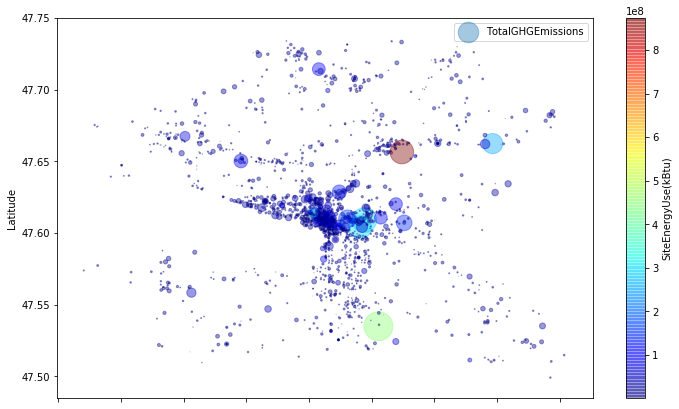

In [93]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
s=df["TotalGHGEmissions"]/20, label="TotalGHGEmissions", figsize=(12,7),
c="SiteEnergyUse(kBtu)", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

**It is clear that the geographical area of the buildings does not impact CO2 emissions and energy consumption.**

In [94]:
# liste of Numerical variables
Num_var = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions','GHGEmissionsIntensity',
           'BuildingAge', 'PropertyGFATotal', 'NumberofFloors', 'PropertyGFABuilding(s)', 
           'GFABuildingRate', 'GFAPerBuilding', 'GFAPerFloor']

In [95]:
# Information about numerical variables.
for col in Num_var:
    print (7*"=",col,7*"=")
    print(df[col].describe())

======= SiteEnergyUse(kBtu) =======
count    1.648000e+03
mean     8.522287e+06
std      3.039631e+07
min      1.680890e+04
25%      1.257589e+06
50%      2.593203e+06
75%      6.962459e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64
======= TotalGHGEmissions =======
count     1648.000000
mean       186.510613
std        755.880837
min          0.120000
25%         20.475000
50%         49.845000
75%        143.607500
max      16870.980000
Name: TotalGHGEmissions, dtype: float64
======= GHGEmissionsIntensity =======
count    1648.000000
mean        1.620807
std         2.345333
min         0.000000
25%         0.360000
50%         0.880000
75%         1.902500
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64
======= BuildingAge =======
count    1648.000000
mean       54.238471
std        32.791436
min         1.000000
25%        27.000000
50%        51.000000
75%        86.000000
max       116.000000
Name: BuildingAge, dtype: float64
======= Property

#### - Detecting and Treating Outliers.

In this part, we will present the different methods of detecting outliers, but depending on the distribution of variables, some methods will not be used but presented for academic reasons.

#### Detecting outliers using Boxplot:

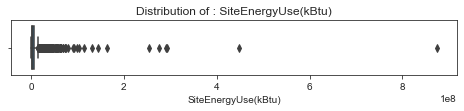

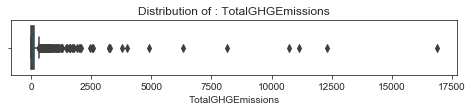

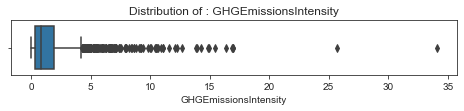

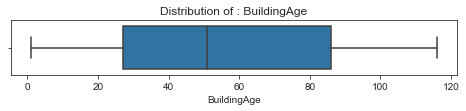

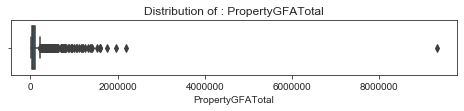

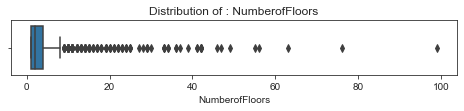

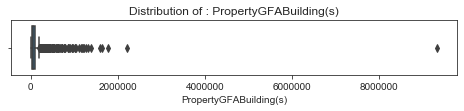

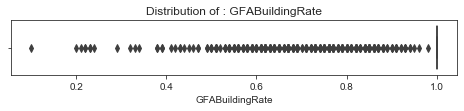

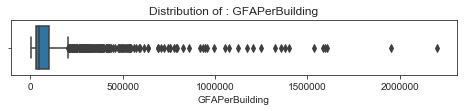

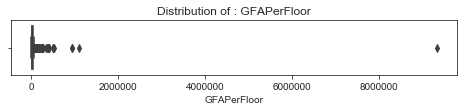

In [96]:
sns.set_style("ticks")
for col in Num_var:
    plt.figure(figsize = (8,1))
    
    sns.boxplot(x=df[col])
    titre = 'Distribution of : ' + col
    plt.title(titre)
    plt.xlabel(col)
    plt.show()
sns.set(font_scale=1)

#### Detecting outliers using the Z-scores:

Criteria: any data point whose Z-score falls out of 3rd standard deviation is an outlier.

**Note**: the Z-score method is suitable for Gaussian distributions, in our case, we noticed that the distributions of the target variables are not, so we will not use it.

In [97]:
dic_outliers_zscores = {}
for col in Num_var:
    sample_outliers = detect_outliers_zscore(df[col],3)
    dic_outliers_zscores[col] = sample_outliers
    #print(f"- Outliers from Z-scores method of {col} is:", sample_outliers)

#### Detecting outliers using the Inter Quantile Range (IQR):

In [98]:
dic_outliers_iqr = {}
for col in Num_var:
    sample_outliers = detect_outliers_iqr(df[col],1.5)
    dic_outliers_iqr[col] = sample_outliers
    # print(f"- Outliers from Z-scores method of {col} is:", sample_outliers)

It is the most suitable method with the skewed distributions of the variables.

#### Handling Outliers.

In [99]:
for col in Num_var:
    handling_outliers_percentile(df,col, 1, 99.9)

In [100]:
# check if Nan created after handling outliers
df.isnull().sum()

BuildingType                 0
PrimaryPropertyType          0
CouncilDistrictCode          0
Neighborhood                 0
Latitude                     0
Longitude                    0
NumberofBuildings            0
NumberofFloors               0
PropertyGFATotal             0
PropertyGFAParking           0
PropertyGFABuilding(s)       0
ListOfAllPropertyUseTypes    0
LargestPropertyUseType       0
ENERGYSTARScore              0
SiteEnergyUse(kBtu)          0
TotalGHGEmissions            0
GHGEmissionsIntensity        0
BuildingAge                  0
GFABuildingRate              0
GFAPerBuilding               0
GFAPerFloor                  0
dtype: int64

The data points that are lesser than the 1st percentile are replaced with the 1st percentile value and the data points that are greater than the 99.9th percentile are replaced with 99.9th percentile value. **In this case, we will take into account all the extreme values, and only 0.1% of the ouliers values have been removed.**

Visualizing the data after treating the outliers

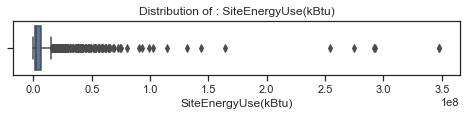

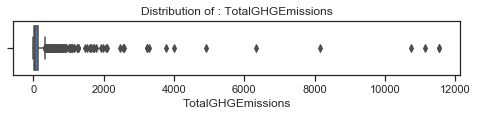

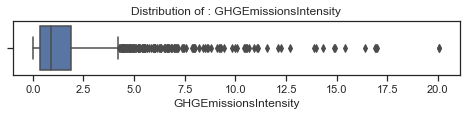

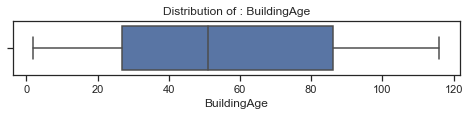

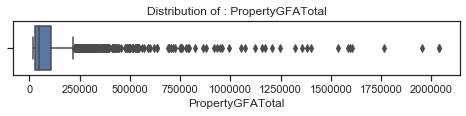

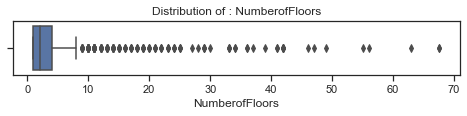

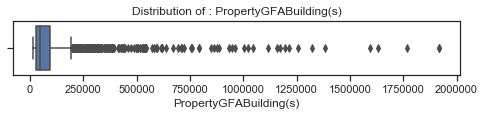

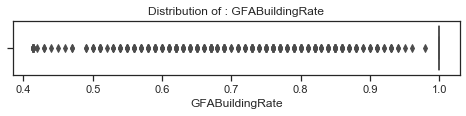

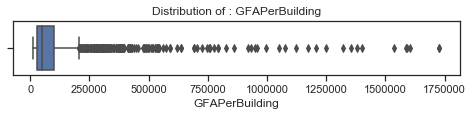

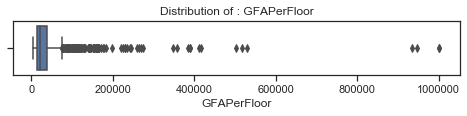

In [101]:
sns.set_style("ticks")
for col in Num_var:
    plt.figure(figsize = (8,1))
    
    sns.boxplot(x=df[col])
    titre = 'Distribution of : ' + col
    plt.title(titre)
    plt.xlabel(col)
    plt.show()
sns.set(font_scale=1)

There is a good improvement by setting the maximum at 99.9 percentile and the minimum at 1 percentile.

Note that the created variable GFABuildingRate presents a lot of outliers, we will drope it from the DataFrame.
GFAperFloor presents some outliers, this variable may occurs some problem to our model, we will drop it.

In [102]:
# drop of 'GFAPerBuilding' from the data.
df = df.drop(['GFABuildingRate', 'GFAPerFloor'], axis=1)

#### - Distribution of numerical variables.

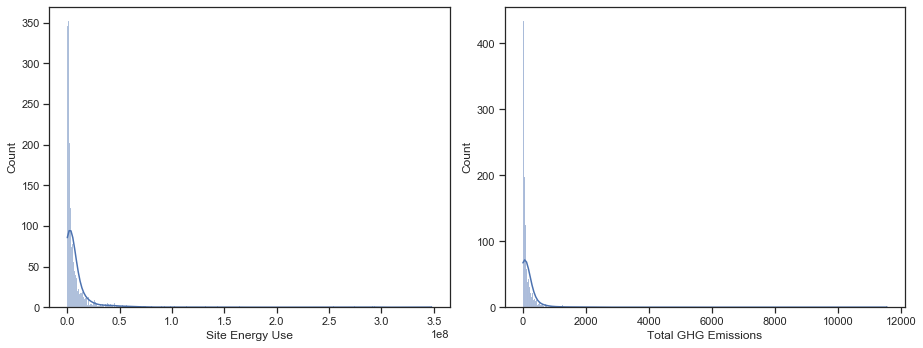

In [103]:
# Display the distributions of the target variables.
sns.set_style("ticks")
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
ax = sns.histplot(df["SiteEnergyUse(kBtu)"], kde=True, palette='bright',ax=axs[0])
ax.set_xlabel("Site Energy Use")
ax.set_ylabel("Count")
ax = sns.histplot(df["TotalGHGEmissions"], kde=True, palette='bright',ax=axs[1])
ax.set_xlabel("Total GHG Emissions")
ax.set_ylabel("Count")
fig.tight_layout()

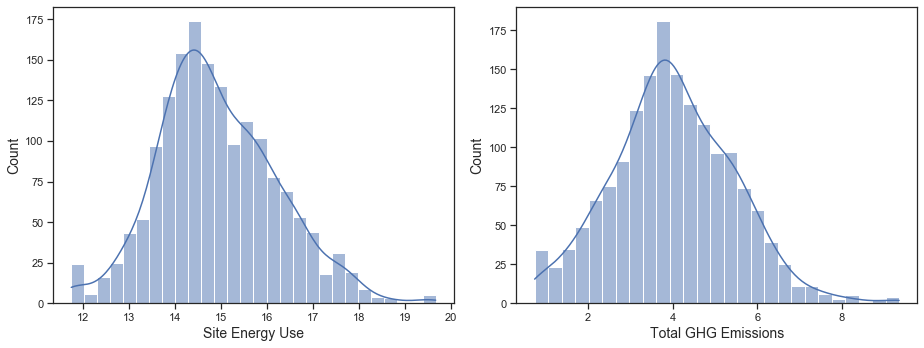

In [104]:
# Log. Transformation.
sns.set_style("ticks")
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
ax = sns.histplot(np.log(1+df["SiteEnergyUse(kBtu)"]), kde=True, palette='bright',ax=axs[0])
ax.set_xlabel("Site Energy Use", size=14)
ax.set_ylabel("Count", size=14)
ax = sns.histplot(np.log(1+df["TotalGHGEmissions"]), kde=True, palette='bright',ax=axs[1])
ax.set_xlabel("Total GHG Emissions", size=14)
ax.set_ylabel("Count", size=14)
fig.tight_layout()

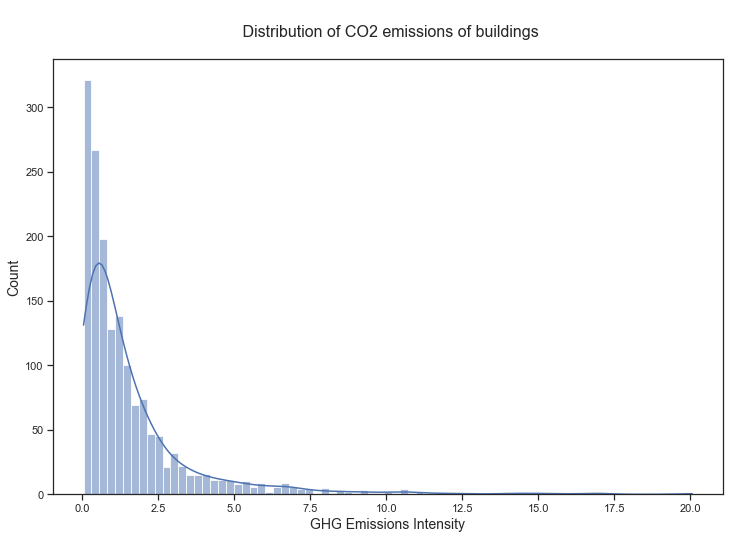

In [105]:
sns.set_style("ticks")
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='GHGEmissionsIntensity', kde=True, palette='bright')
ax.set_xlabel("GHG Emissions Intensity", size=14)
ax.set_ylabel("Count", size=14)
plt.title("\n Distribution of CO2 emissions of buildings\n", size=16)
plt.show()

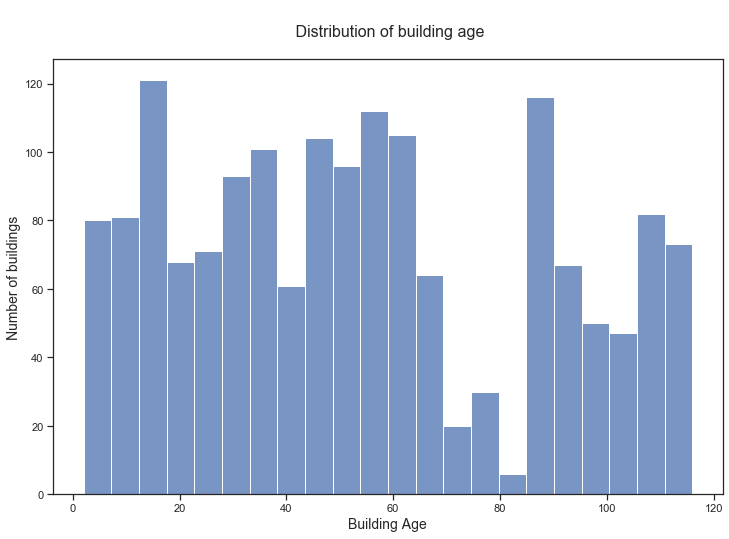

In [106]:
sns.set_style("ticks")
step = int((df.BuildingAge.max() - df.BuildingAge.min())/5)
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='BuildingAge', bins=step, kde=False, palette='bright')
ax.set_xlabel("Building Age", size=14)
ax.set_ylabel("Number of buildings", size=14)
plt.title("\n Distribution of building age\n", size=16)
plt.show()

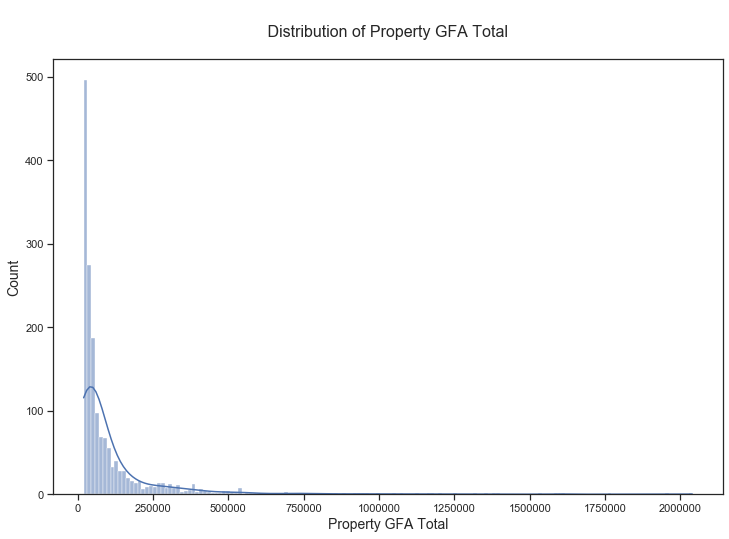

In [107]:
sns.set_style("ticks")
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='PropertyGFATotal', kde=True, palette='bright')
ax.set_xlabel("Property GFA Total", size=14)
ax.set_ylabel("Count", size=14)
plt.title("\n Distribution of Property GFA Total \n", size=16)
plt.show()

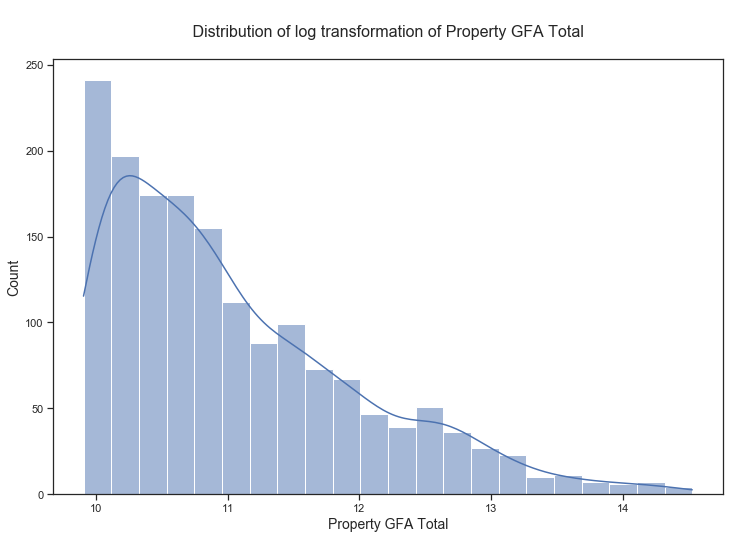

In [108]:
# Log. Transformation
sns.set_style("ticks")
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(np.log(1+df["PropertyGFATotal"]), kde=True, palette='bright')
ax.set_xlabel("Property GFA Total", size=14)
ax.set_ylabel("Count", size=14)
plt.title("\n Distribution of log transformation of Property GFA Total \n", size=16)
plt.show()

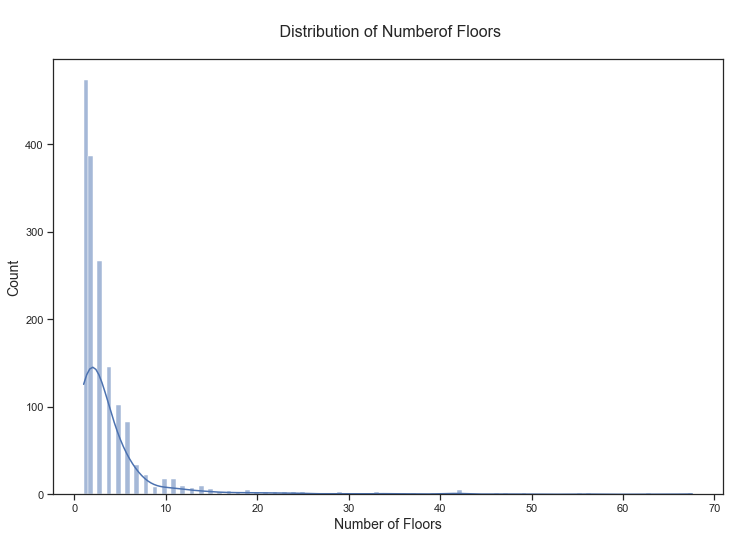

In [109]:
fig = plt.figure(figsize=(12,8))
sns.set_style("ticks")
ax = sns.histplot(data=df, x='NumberofFloors', kde=True, palette='bright')
ax.set_xlabel("Number of Floors", size=14)
ax.set_ylabel("Count", size=14)
plt.title("\n Distribution of Numberof Floors\n", size=16)
plt.show()

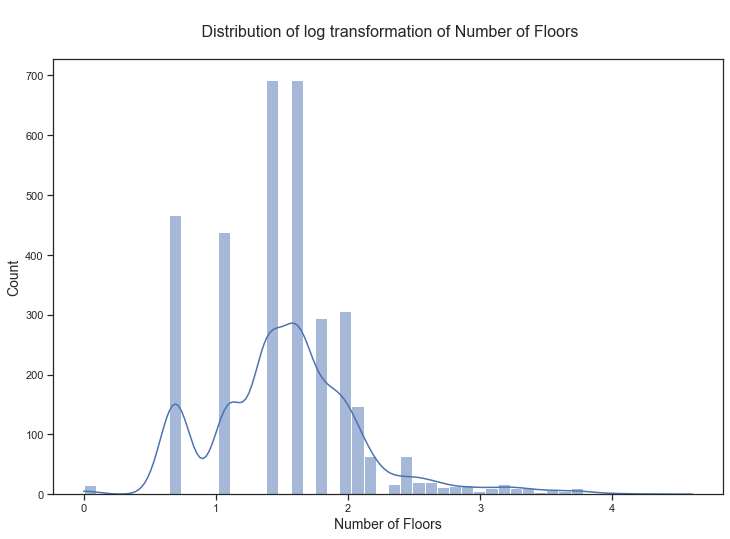

In [110]:
# Log. Transformation
sns.set_style("ticks")
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(np.log(1+df_2016["NumberofFloors"]), kde=True, palette='bright')
ax.set_xlabel("Number of Floors", size=14)
ax.set_ylabel("Count", size=14)
plt.title("\n Distribution of log transformation of Number of Floors\n", size=16)
plt.show()

#### <font color="b" id="section_1_4_2">1.4.2 Multivariate analysis.</font>

In [111]:
Target_variables = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']
Num_Variables = ['BuildingAge', 'PropertyGFATotal', 'NumberofFloors', 
                 'PropertyGFABuilding(s)', 'GFAPerBuilding']

================================================== SiteEnergyUse(kBtu) ==================================================


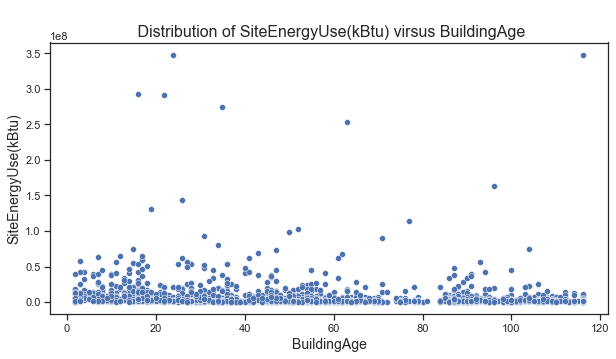

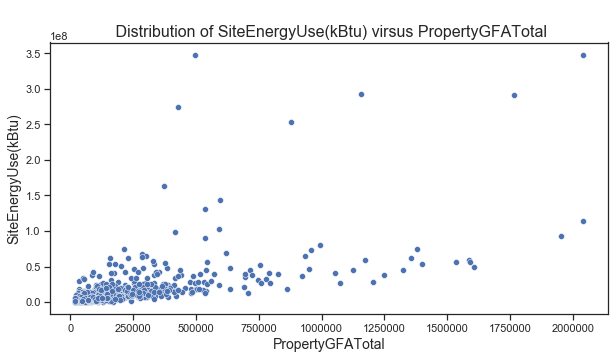

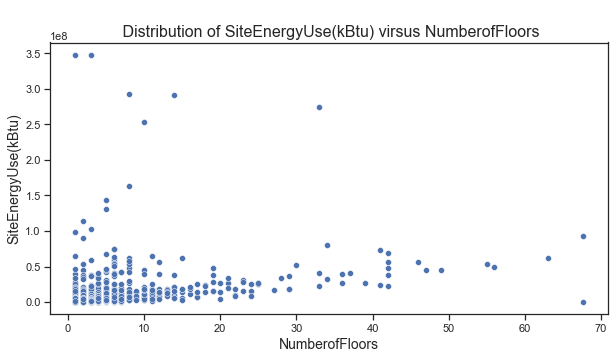

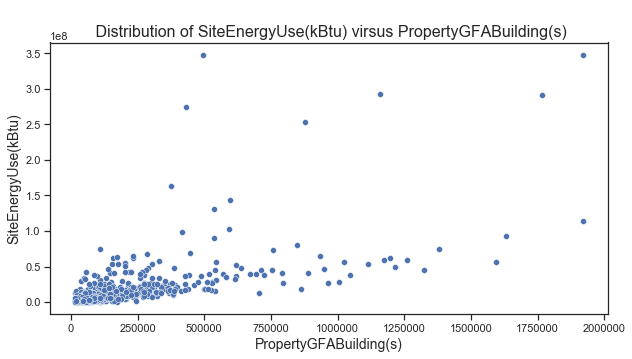

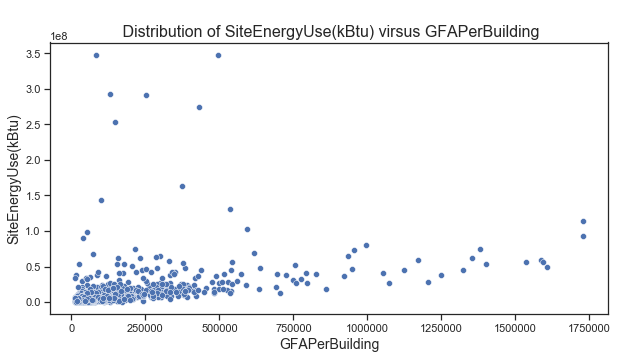

================================================== TotalGHGEmissions ==================================================


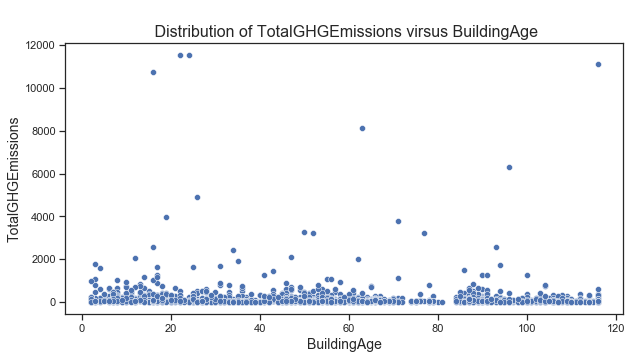

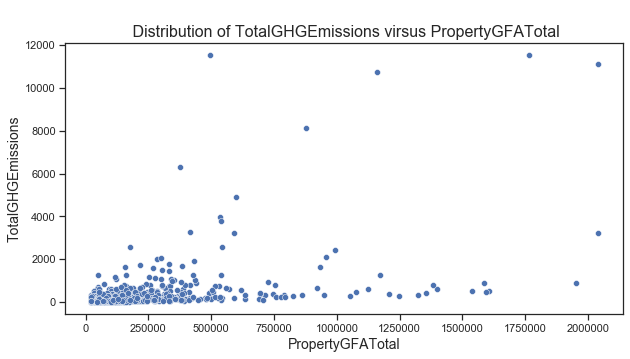

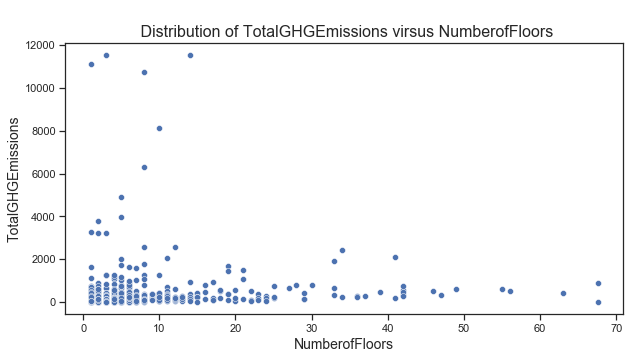

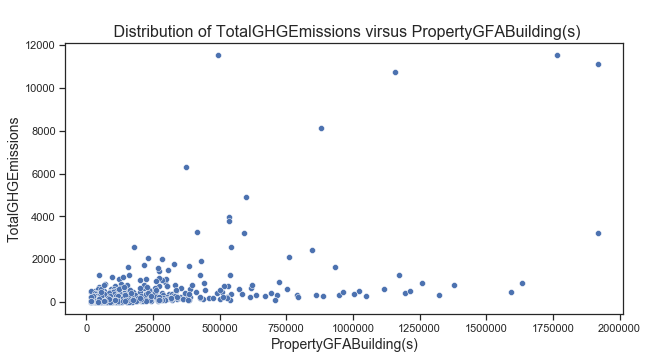

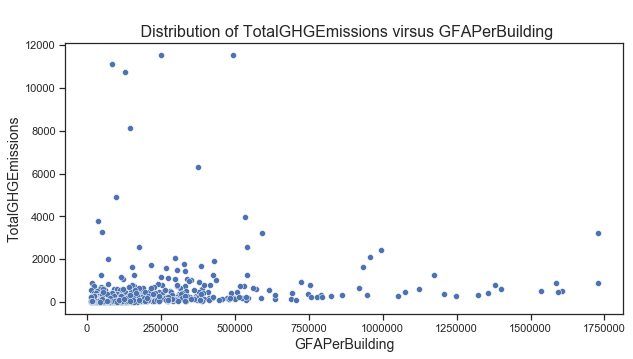

In [112]:
# display the distribution of target variables as function of independant variables.
for col_tar in  Target_variables:
    print(50*"=",col_tar, 50*"=")
    for col_num in Num_Variables:
        plot_tar_num(col_num,col_tar,df)

#### <font color="b" id="section_1_5">1.5. Exploratory Data analysis of categorical variables.</font>

#### <font color="b" id="section_1_5_1">1.5.1 univariate analysis.</font>

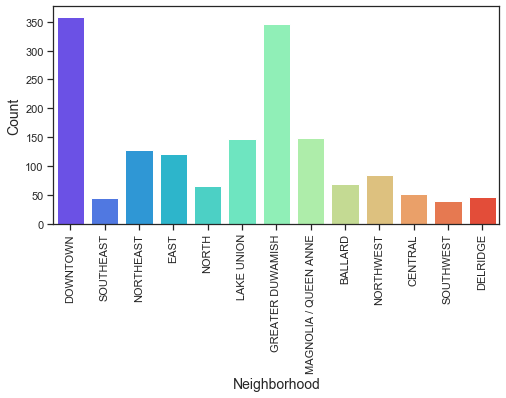

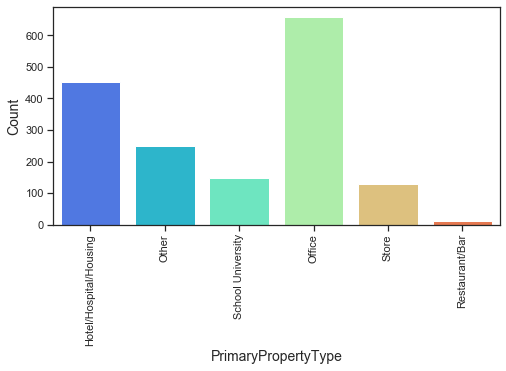

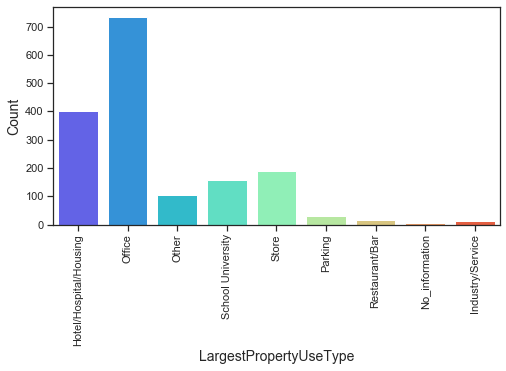

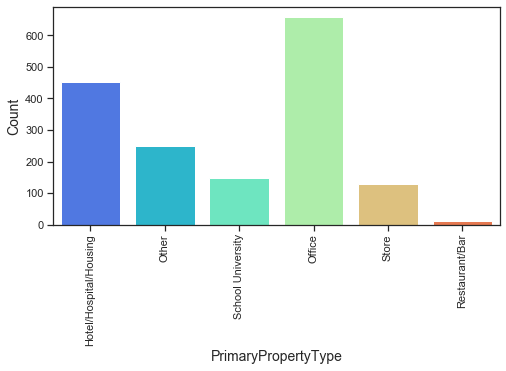

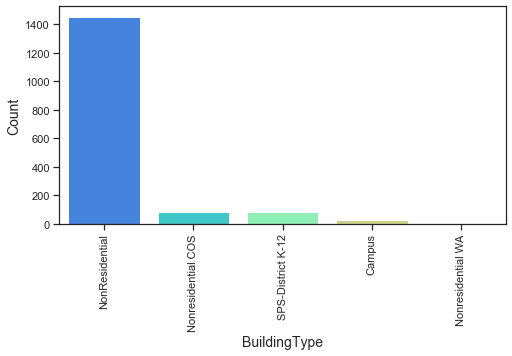

In [113]:
variable_Cat = ['Neighborhood', 'PrimaryPropertyType', 'LargestPropertyUseType', 'PrimaryPropertyType', 'BuildingType']
sns.set_style("ticks")
for col in variable_Cat:
    plt.figure(figsize=(8,4))
    ax = sns.countplot(x=col,data=df, palette='rainbow')
    ax.set_xlabel(col, size=14)
    ax.set_ylabel("Count", size=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

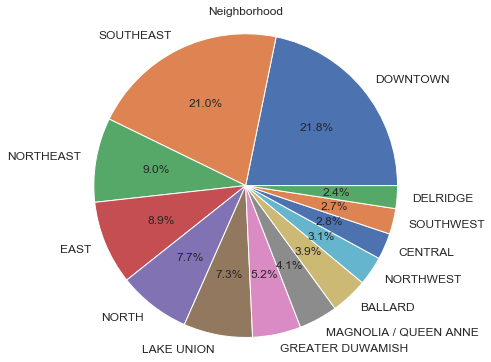

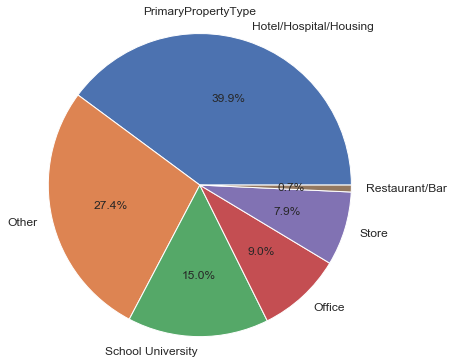

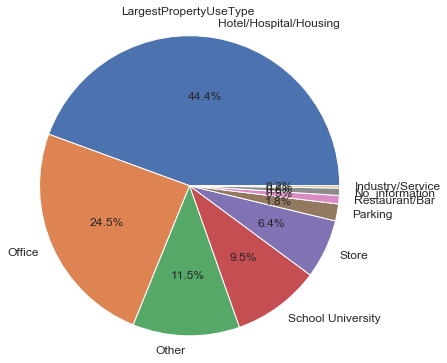

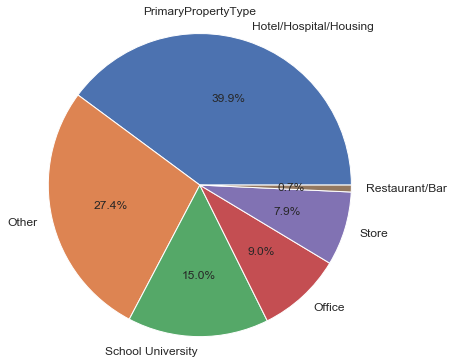

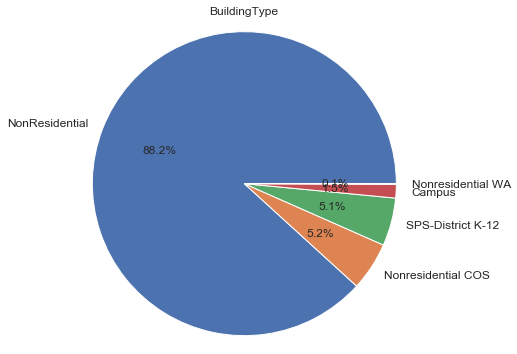

In [114]:
for col in variable_Cat:
    fig, ax = plt.subplots(figsize=(6,6))
    ax.pie(df[col].value_counts(), labels=df[col].unique(), autopct='%1.1f%%', textprops=dict(size=12))
    ax.axis('equal')
    ax.set_title(col)
    plt.show()

#### <font color="b" id="section_1_5_2">1.5.2 Multivariate analysis.</font>

================================================== Neighborhood ==================================================


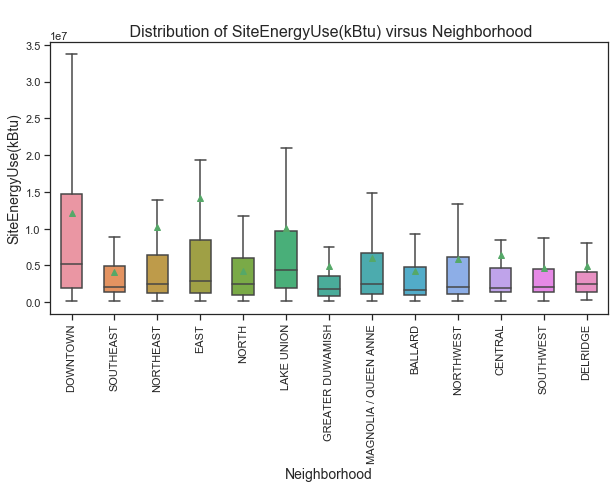

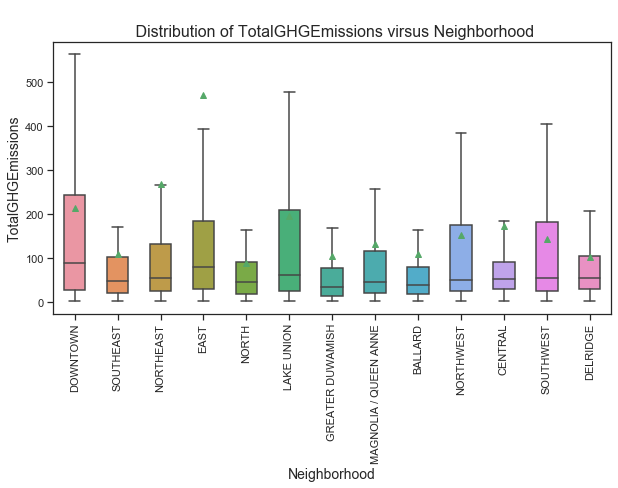

================================================== PrimaryPropertyType ==================================================


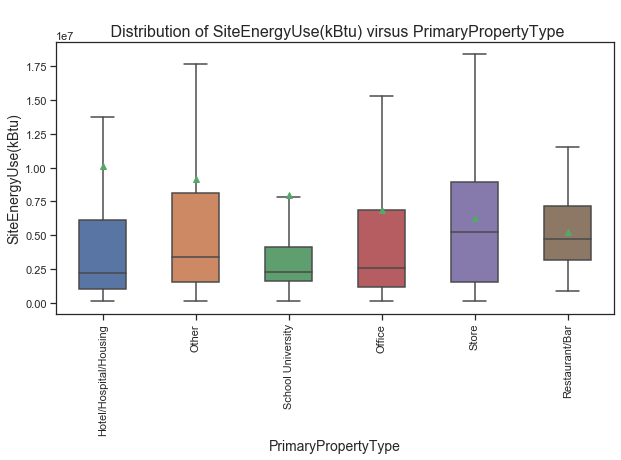

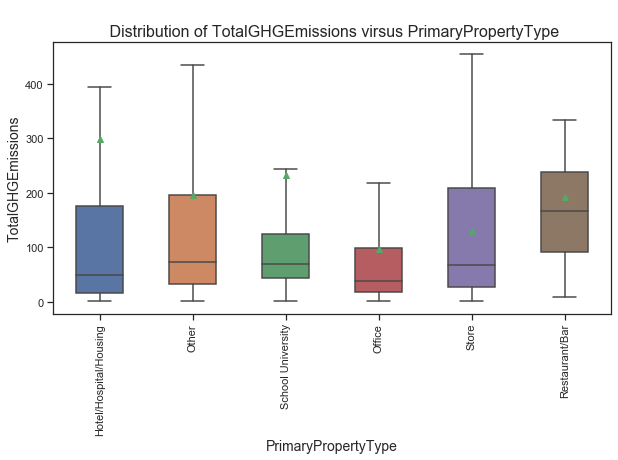

================================================== LargestPropertyUseType ==================================================


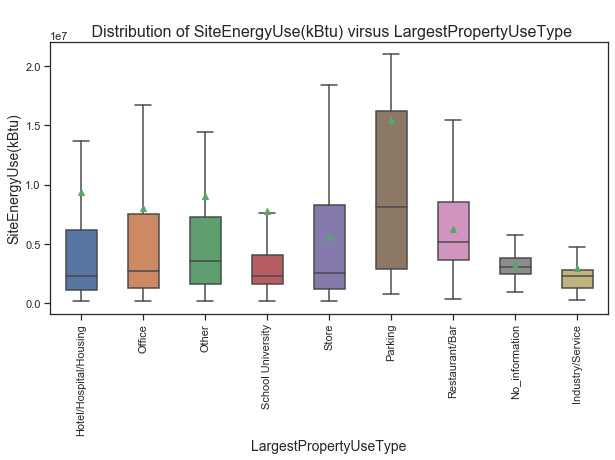

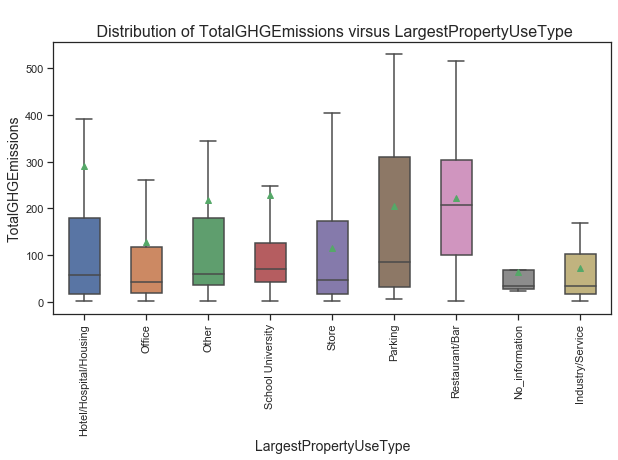

================================================== PrimaryPropertyType ==================================================


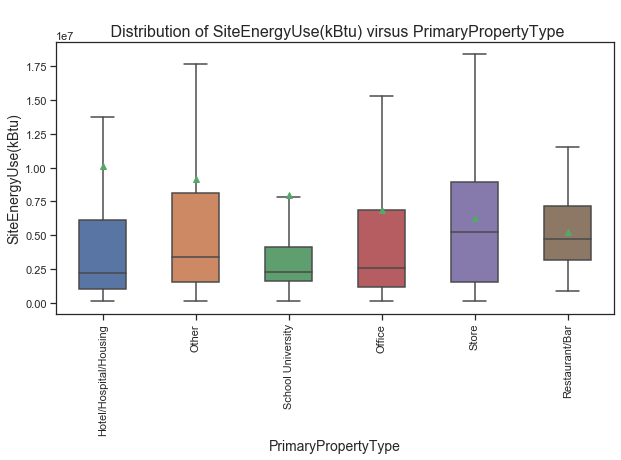

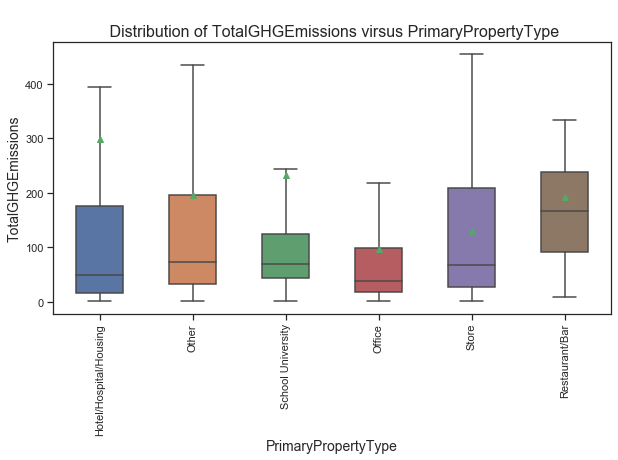

================================================== BuildingType ==================================================


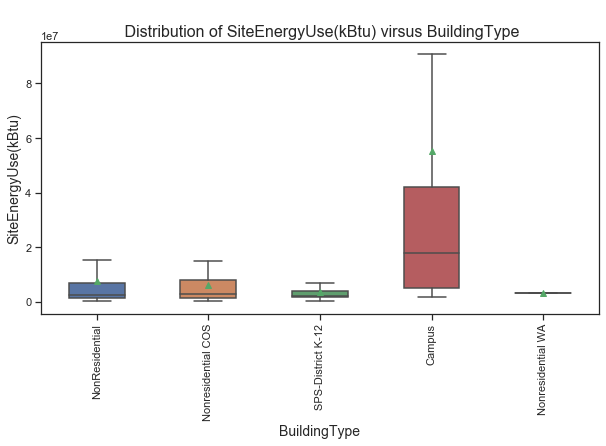

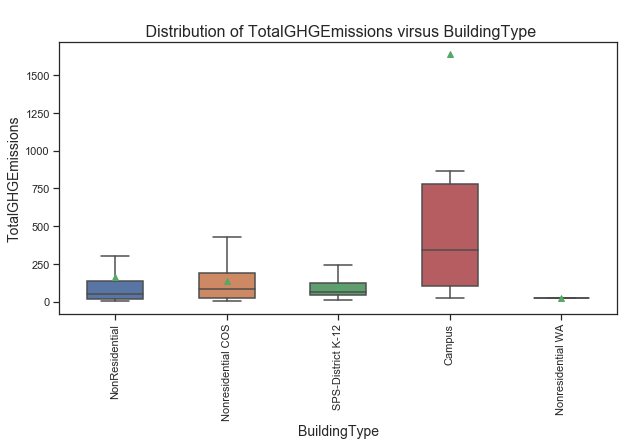

In [115]:
for col_cat in  variable_Cat:
    print(50*"=",col_cat, 50*"=")
    for col_num in Target_variables:
        plot_bi_var(col_cat,col_num,df)

In [116]:
df.head()

BuildingType     PrimaryPropertyType CouncilDistrictCode Neighborhood  \
0  NonResidential  Hotel/Hospital/Housing                   7     DOWNTOWN   
1  NonResidential  Hotel/Hospital/Housing                   7     DOWNTOWN   
2  NonResidential  Hotel/Hospital/Housing                   7     DOWNTOWN   
3  NonResidential  Hotel/Hospital/Housing                   7     DOWNTOWN   
4  NonResidential  Hotel/Hospital/Housing                   7     DOWNTOWN   

   Latitude  Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0  47.61220 -122.33799                1.0            12.0           88434.0   
1  47.61317 -122.33393                1.0            11.0          103566.0   
2  47.61393 -122.33810                1.0            41.0          956110.0   
3  47.61412 -122.33664                1.0            10.0           61320.0   
4  47.61375 -122.34047                1.0            18.0          175580.0   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                 88434.0                          Hotel   
1               15064                 88502.0     Hotel, Parking, Restaurant   
2              196718                759392.0                          Hotel   
3                   0                 61320.0                          Hotel   
4               62000                113580.0  Hotel, Parking, Swimming Pool   

   LargestPropertyUseType  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
0  Hotel/Hospital/Housing             60.0            7226362.5   
1  Hotel/Hospital/Housing             61.0            8387933.0   
2  Hotel/Hospital/Housing             43.0           72587024.0   
3  Hotel/Hospital/Housing             56.0            6794584.0   
4  Hotel/Hospital/Housing             75.0           14172606.0   

   TotalGHGEmissions  GHGEmissionsIntensity  BuildingAge  GFAPerBuilding  
0             249.98                   2.83           89         88434.0  
1             295.86                   2.86           20        103566.0  
2            2089.28                   2.19           47        956110.0  
3             286.43                   4.67           90         61320.0  
4             505.01                   2.88           36        175580.0

In [117]:
# check if there is no nan in the dataframe.
df.isnull().sum()

BuildingType                 0
PrimaryPropertyType          0
CouncilDistrictCode          0
Neighborhood                 0
Latitude                     0
Longitude                    0
NumberofBuildings            0
NumberofFloors               0
PropertyGFATotal             0
PropertyGFAParking           0
PropertyGFABuilding(s)       0
ListOfAllPropertyUseTypes    0
LargestPropertyUseType       0
ENERGYSTARScore              0
SiteEnergyUse(kBtu)          0
TotalGHGEmissions            0
GHGEmissionsIntensity        0
BuildingAge                  0
GFAPerBuilding               0
dtype: int64

Let's save the data in a new file to work on the different prediction models.

To preserve the exact structure of the DataFrame, an easy solution is to serialize the DF in pickle format with pd.to_pickle, instead of using csv, which will always throw away all information about data types, and will require manual reconstruction after re-import.

In [118]:
# Save to pickle
df.to_pickle('pickle-df.pkl')
# Save with compression
#df.to_pickle('pickle-df.pkl.gz', compression='gzip')